In [2]:
%load_ext rpy2.ipython

Импортируем необходимые библиотеки:

In [1]:
import pip
pip.main(["install", "pingouin"])
import pandas as pd
import numpy as np
import seaborn as sns
import random
import scipy.stats as stats
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
import statsmodels.api as sm
import scipy as sc
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting pingouin

Downloading pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)

Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from pingouin) (3.8.0)

Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.26.4)

Requirement already satisfied: pandas>=1.5 in /usr/local/lib/python3.10/dist-packages (from pingouin) (2.2.2)

Collecting pandas-flavor (from pingouin)

Downloading pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)

Requirement already satisfied: scikit-learn>=1.2 in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.5.2)

Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.13.1)

Requirement already satisfied: seaborn in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.13.2)

Requirement already satisfied: statsmodels in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.14.4)

Requirement already satisfied: tabulate in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.9.0)

Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2024.2)

Requirement already satisfied: tzdata>=2022.7 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2024.2)

Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.2->pingouin) (1.4.2)

Requirement already satisfied: threadpoolctl>=3.1.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.2->pingouin) (3.5.0)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (1.3.1)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (4.55.1)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (1.4.7)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (24.2)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (11.0.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (3.2.0)

Requirement already satisfied: xarray in /usr/local/lib/python3.10/dist-packages (from pandas-flavor->pingouin) (2024.10.0)

Requirement already satisfied: patsy>=0.5.6 in /usr/local/lib/python3.10/dist-packages (from statsmodels->pingouin) (1.0.1)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.8.2->pandas>=1.5->pingouin) (1.16.0)

Downloading pingouin-0.5.5-py3-none-any.whl (204 kB)

Output()

Downloading pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)

Installing collected packages: pandas-flavor, pingouin

Successfully installed pandas-flavor-0.6.0 pingouin-0.5.5

NumExpr defaulting to 2 threads.

Загрузим наш датасет

In [3]:
import logging


logging.getLogger('rpy2.rinterface_lib.callbacks').setLevel(logging.ERROR)


In [ ]:
%%R
oldw <- getOption("warn") # предупреждающие сообщения не выводятся
options(warn = -1)
install.packages("ggplot2")
install.packages("outliers")
install.packages("DescTools")
install.packages("caret")
install.packages("Metrics")
install.packages("nortest")
install.packages("car")
install.packages("RColorBrewer")
install.packages("tidyverse")
install.packages("polynom")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("corrplot")
install.packages("dplyr")
install.packages("pwr")

library(pwr)
library(dplyr)
library(corrplot)
library(caret)
library(Metrics)
library(polynom)
library(rpart)
library(rpart.plot)
library(tidyverse)
library(RColorBrewer)
library(ggplot2)
library(outliers)
library(DescTools)
library(car)

library(nortest)


In [ ]:
data = pd.read_csv('cars.csv')

In [ ]:
%%R
df = read.csv('cars.csv')


Этот датасет составлен из нескольких крупных датасетов об автомобилях, выставленных на перепродажу в Индии. Посмотрим, какие в нем есть колонки:

In [ ]:
data.head(5)

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN


Выведем несколько строк, подсчитаем числовые данные, число пропусков в столбцах

In [ ]:
data.describe()

,age,engine,km,owner,price,mileage,power,seats
count,32199.000000,24068.000000,3.220000e+04,16819.000000,3.220000e+04,21380.000000,21273.000000,29353.000000
mean,7.120625,1489.872569,5.495269e+04,1.263452,7.347001e+05,19.305532,103.497647,5.233537
std,3.485577,520.916872,5.577145e+04,0.490463,7.037702e+05,4.418605,45.002260,0.707639
min,0.000000,72.000000,0.000000e+00,1.000000,4.000000e+04,0.000000,34.200000,0.000000
25%,4.000000,1197.000000,3.020825e+04,1.000000,3.850000e+05,16.500000,74.000000,5.000000
50%,7.000000,1248.000000,5.000000e+04,1.000000,5.510000e+05,19.010000,88.500000,5.000000
75%,9.000000,1591.000000,7.102075e+04,1.000000,7.920000e+05,22.320000,120.000000,5.000000
max,29.000000,5998.000000,6.500000e+06,4.000000,7.066000e+06,46.620600,600.000000,10.000000


In [ ]:
%%R
df <- subset(df, km <= 300000)
str(df)
summary(df)


'data.frame':	32162 obs. of  14 variables:
 $ brand       : chr  "mahindra" "hyundai" "tata" "honda" ...
 $ model       : chr  "thar" "verna" "harrier" "city" ...
 $ transmission: chr  "manual" "manual" "manual" "automatic" ...
 $ age         : num  4 6 2 1 3 3 2 4 2 5 ...
 $ fuel        : chr  "diesel" "petrol" "diesel" "petrol" ...
 $ engine      : num  2184 1591 1956 1498 1498 ...
 $ km          : num  11003 66936 27990 5061 23480 ...
 $ owner       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ price       : num  1231000 786000 1489000 1227000 887000 ...
 $ location    : chr  "" "" "" "" ...
 $ mileage     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ power       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ seats       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ type        : chr  "" "" "" "" ...
    brand              model           transmission            age        
 Length:32162       Length:32162       Length:32162       Min.   : 0.000  
 Class :character   Class :character   Class :characte

Для дальнейшего анализа удалим пропуски в необходимых столбцах. Также удалим данные о машинах с пробегом более 300тыс км, поскольку этих данные являются выбросами и сильно влияют на графики. Также некоторые из этих данных кажутся нереалистичными (несколько машин с пробегом более миллиона километров за малое количество лет)

In [ ]:
missing_values = data['owner'].isnull().sum()
print(missing_values)
data = data.dropna(subset=['km'])
data = data.dropna(subset=['owner'])
data.drop(data[data['km'] > 300000].index, inplace=True)

data['owner'] = data['owner'].astype(int)
kms = data['km']
owner = data['owner']

15381


In [ ]:
%%R
df <- df %>% filter(!is.na(owner))
df <- df %>% filter(!is.na(km))

# 2. Реализовать аппроксимацию распределений данных с помощью ядерных оценок.
Построим гистограмму с пробегом машин и ее ядерное приближение

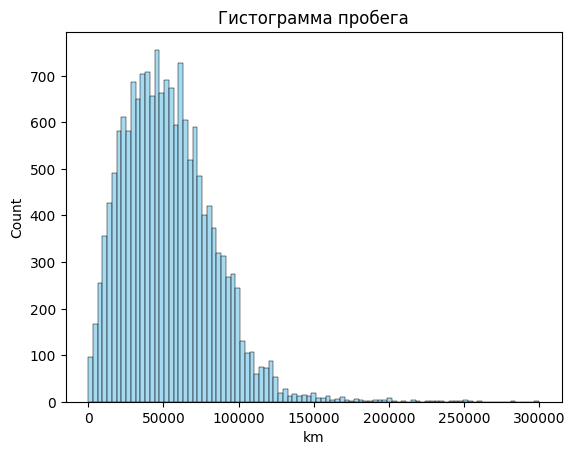

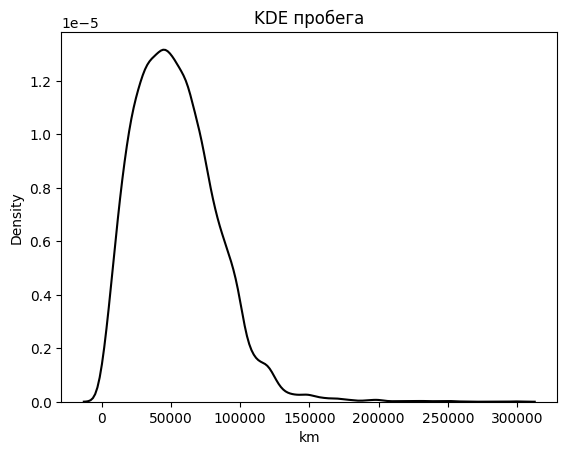

In [ ]:
#гистограмма данных
plt.title('Гистограмма пробега')
sns.histplot(kms, color = 'skyblue')
plt.show()
#ядерное приближение
plt.title('KDE пробега')
Spl2 = sns.kdeplot(kms, color = 'black')
plt.show()

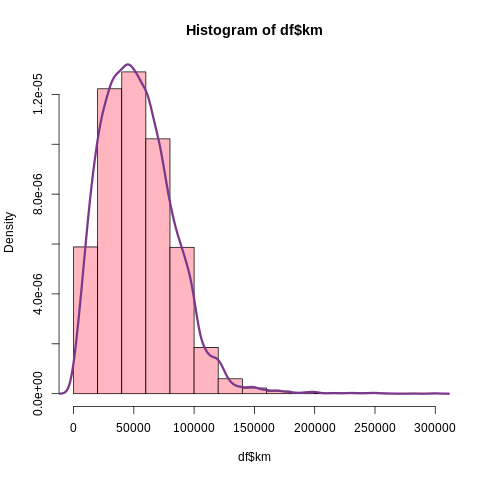

In [ ]:
%%R
hist(df$km, freq = FALSE, col = "lightpink")
# Estimate density
dens <- density(df$km)
# Overlay density curve
lines(dens, col = "mediumorchid4", lwd = 3)

По графику видим, что данные распределены не нормально. Также можно пронаблюдать резкие перепады в высоте столбцов около 50тыс км пробега, 100тыс км и 150тыс км. Заметим, что либо это из-за того, что владельцы решают продавать автомобиль до достижения определенного круглого числа, либо скручивают пробег, чтобы машина попадала под пользовательские фильтры на сайтах для продажи.


---
#3. Реализовать анализ данных с помощью cdplot, dotchart, boxplot и stripchart.
Далее построим **cdplot** и **scatterplot** зависимости километража от количества владельцев. Проверим с их помощью гипотезу, что при большем числе владельцев вырастает и пробег автомобиля:

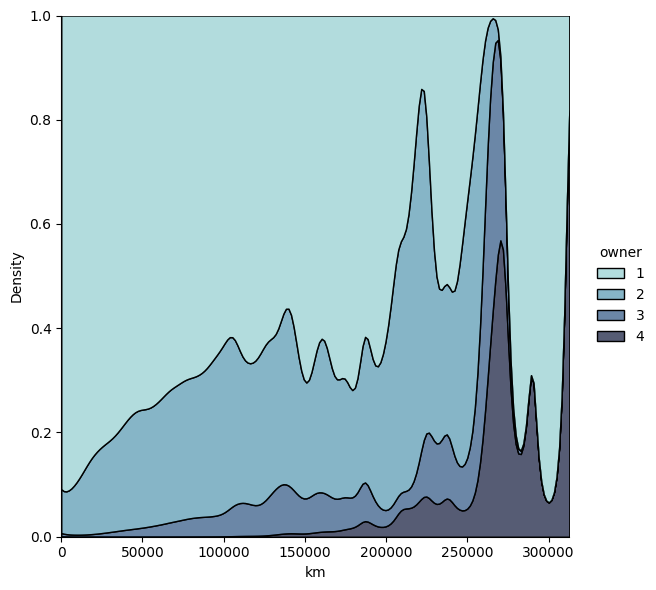

In [ ]:
#cdplot
sns.displot (x=kms, hue= owner, kind="kde", height=6, multiple="fill", clip=(0, None), palette="ch:rot=-.25,hue=1,light=.75")
plt.show()

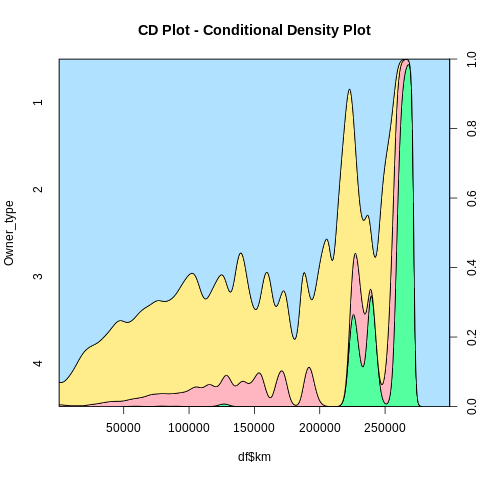

In [ ]:
%%R
Owner_type <- factor(df$owner)
cdplot(Owner_type ~ df$km, main = "CD Plot - Conditional Density Plot", col = c("seagreen1", "lightpink", "lightgoldenrod1", "lightskyblue1"))

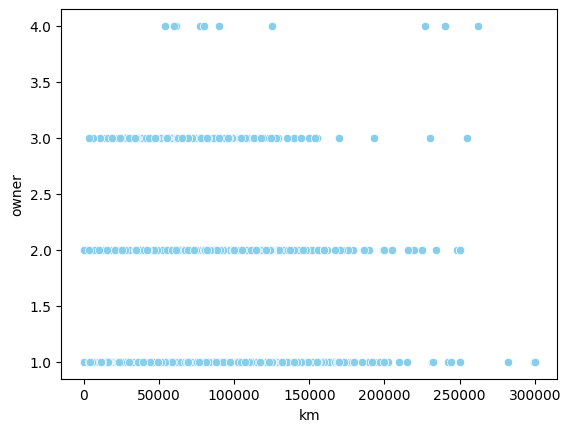

In [ ]:
#scatterplot
sns.scatterplot(x = kms, y = owner, color = "skyblue")
plt.show()

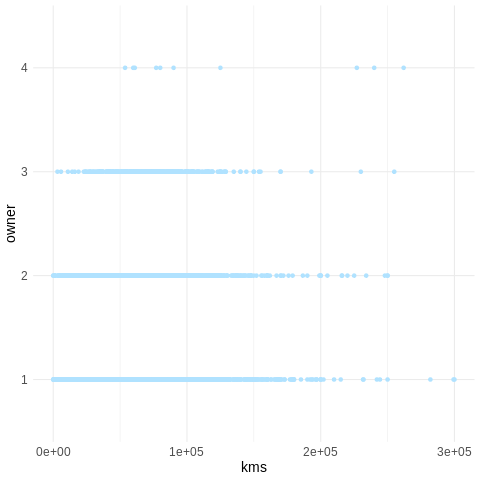

In [ ]:
%%R
ggplot(df, aes(x = km, y = factor(owner))) +
  geom_point(color = "lightskyblue1") +
  theme_minimal() +
  labs(x = "kms", y = "owner") +
  theme(
    axis.text = element_text(size = 12),  # Размер текста меток на осях
    axis.title = element_text(size = 14)  # Размер текста подписей осей
  )

Гипотеза подтверждается. Далее построим **boxplot** зависимости пробега от типа топлива автомобиля.

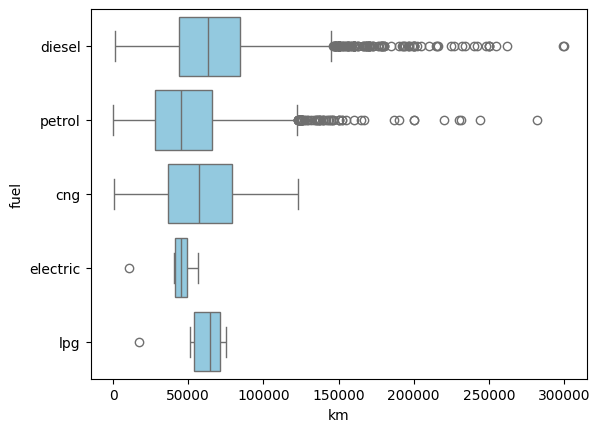

In [ ]:
sns.boxplot(x = kms, y = data['fuel'], color = "skyblue")
plt.show()

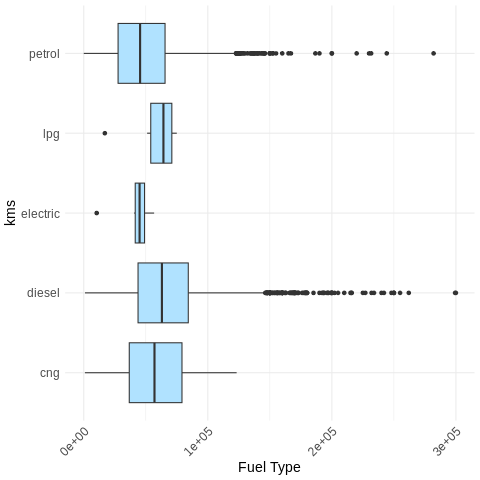

In [ ]:
%%R
ggplot(df, aes(x = km, y = factor(fuel))) +
  geom_boxplot(fill = "lightskyblue1") +
  theme_minimal() +
  labs(x = "Fuel Type", y = "kms") +
  theme(
    axis.text = element_text(size = 12),  # Размер текста меток на осях
    axis.title = element_text(size = 14),  # Размер текста подписей осей
    axis.text.x = element_text(angle = 45, hjust = 1)  # Наклон текста на оси x
  )

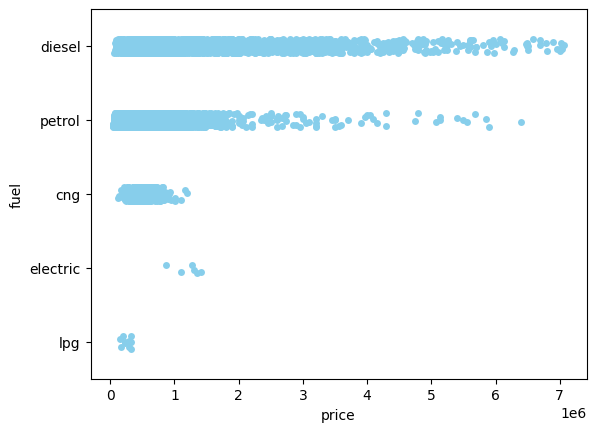

In [ ]:
sns.stripplot(x = data['price'], y = data['fuel'], color = "skyblue")
plt.show()

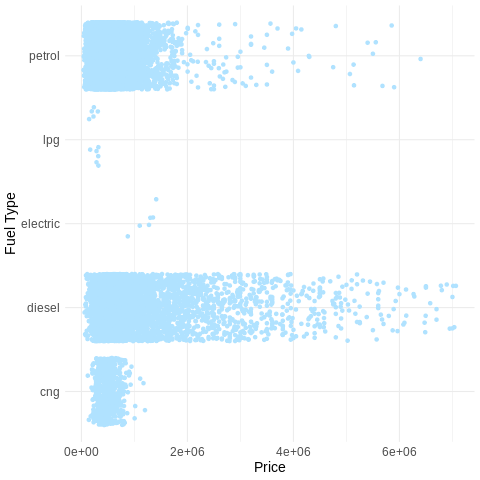

In [ ]:
%%R
ggplot(df, aes(x = price, y = (factor(fuel)))) +
  geom_jitter(color = "lightskyblue1", width = 0.2) +
  theme_minimal() +
  labs(x = "Price", y = "Fuel Type") +
  theme(
    axis.text = element_text(size = 12),  # Размер текста меток на осях
    axis.title = element_text(size = 14)  # Размер текста подписей осей
  )

# 4. Проверить, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона. Визуализировать результаты.
Поскольку мои данные распределены не нормально, генерируем датасет с нормальным распределением, чтобы применить к нему тесты Граббса и Диксона. Создадим вручную несколько выбросов


In [ ]:
data_orig = np.random.normal(0, 100, 5000)
df = data_orig.copy()
data_orig = pd.DataFrame(data_orig, columns=['Value'])
#добавление выбросов
outliers = np.array([500, -500, 1000, -1000])
rand_ind = [random.randint(0, 5000) for _ in range(4)]
for i in range(len(rand_ind)):
    df[rand_ind[i]] = outliers[i]

Теперь применим к данным критерий Граббса

Grubbs test 9.785252786782772 4.421709440849465


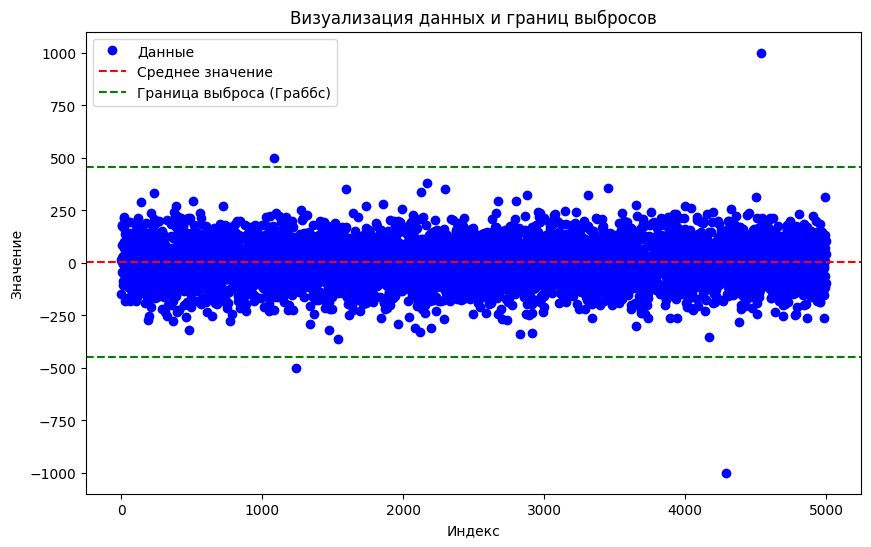

In [ ]:
#критерий граббса
alpha = 0.05
n = len(df)
mean = np.mean(df)
std = np.std(df)
max_dev = np.max(np.abs(df - mean))
t_value = max_dev / std
t_critical = stats.t.ppf(1 - alpha / (2 * n), n - 2)
print("Grubbs test", t_value, t_critical)
# Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(df, 'bo', label='Данные')
plt.axhline(y=np.mean(df), color='r', linestyle='--', label='Среднее значение')
plt.axhline(y=np.mean(df) + t_critical * np.std(df), color='g', linestyle='--', label='Граница выброса (Граббс)')
plt.axhline(y=np.mean(df) - t_critical * np.std(df), color='g', linestyle='--')
plt.legend()
plt.title('Визуализация данных и границ выбросов')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

Grubbs Test Statistic: 9.735067 
Critical Value: 4.421709 
Наличие выбросов подтверждено.


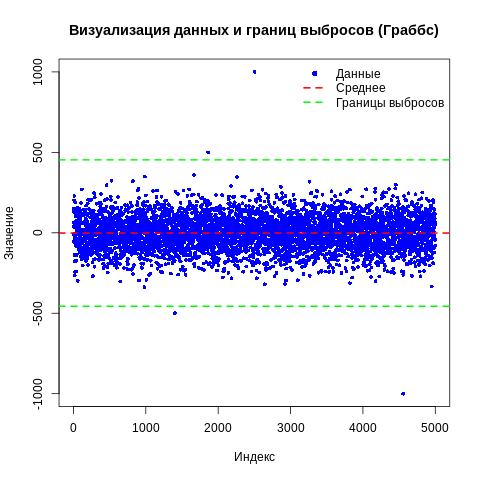

In [ ]:
%%R
set.seed(42)
data <- c(rnorm(5000, mean = 0, sd = 100) )  # Добавляем выброс 100

# Добавление выбросов
outliers <- c(500, -500, 1000, -1000)
rand_ind <- sample(1:5000, length(outliers))
data[rand_ind] <- outliers

# Параметры для теста Граббса
alpha <- 0.05
n <- length(data)
mean_value <- mean(data)
std_dev <- sd(data)

# Граббс: максимальное отклонение
max_dev <- max(abs(data - mean_value))
t_value <- max_dev / std_dev
t_critical <- qt(1 - alpha / (2 * n), df = n - 2)

# Вывод результатов
cat("Grubbs Test Statistic:", t_value, "\n")
cat("Critical Value:", t_critical, "\n")
if (t_value > t_critical) {
  cat("Наличие выбросов подтверждено.\n")
} else {
  cat("Выбросы отсутствуют.\n")
}

# Границы выбросов
outlier_boundary_upper <- mean_value + t_critical * std_dev
outlier_boundary_lower <- mean_value - t_critical * std_dev

# Визуализация
plot(data, pch = 16, col = "blue", main = "Визуализация данных и границ выбросов (Граббс)",
     xlab = "Индекс", ylab = "Значение", cex = 0.7)
abline(h = mean_value, col = "red", lty = 2, lwd = 2)  # Среднее значение
abline(h = outlier_boundary_upper, col = "green", lty = 2, lwd = 2)  # Верхняя граница
abline(h = outlier_boundary_lower, col = "green", lty = 2, lwd = 2)  # Нижняя граница

legend("topright", legend = c("Данные", "Среднее", "Границы выбросов"),
       col = c("blue", "red", "green"), lty = c(NA, 2, 2), pch = c(16, NA, NA),
       lwd = c(NA, 2, 2), bty = "n")



Теперь реализуем тест Диксона. Он применим только на малых объемах данных, поэтому берем выборку размера 25 и создадим в данных 1 выброс

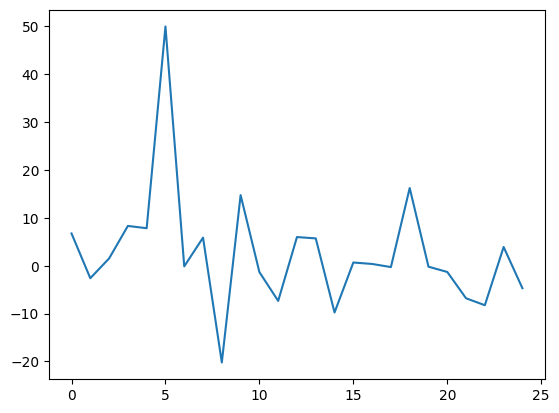

Q-тест Диксона 0.48080363949440835 0.277


In [ ]:
# тест Диксона
df1 = np.random.normal(0, 10, 25)
df1[5] = 50
plt.plot(df1)
plt.show()
alpha=0.05
n = len(df1)
sorted_data = np.sort(df1)
q_value = (sorted_data[-1] - sorted_data[-2]) / (sorted_data[-1] - sorted_data[0])
q_critical = 0.277
print("Q-тест Диксона", q_value, q_critical)



	Dixon test for outliers

data:  data
Q = 0.6167, p-value < 2.2e-16
alternative hypothesis: highest value 50 is an outlier



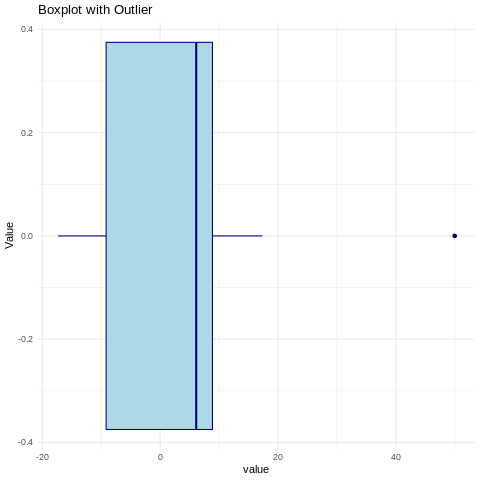

In [ ]:
%%R
# Проверка выбросов с помощью Q-теста Диксона
data <- rnorm(25, mean = 0, sd = 10)
data[1] <- 50
dixon_test <- dixon.test(data)
print(dixon_test)

# Визуализация результатов
ggplot(data.frame(value = data), aes(x = value)) +
  geom_boxplot(fill = "lightblue", color = "darkblue") +
  ggtitle("Boxplot with Outlier") +
  ylab("Value") +
  theme_minimal()


# 5. Воспользоваться инструментами для заполнения пропусков в данных. Пропуски внести вручную и сравнить результаты заполнения с истинными значениями.
Возьмем данные, сгененрированные для критерия Граббса и вместо выбросов создадим пропуски.

In [ ]:
#Вместо выбросов создадим пропуски
for i in rand_ind:
    df[rand_ind] = np.nan
df = pd.DataFrame(df, columns=['Value'])

Заполним пропуски средним, медианой и модой и по графикам сравним полученные результаты между собой и реальными значениями

1.9269376695433105 1.6708989084082604 -338.68137614883


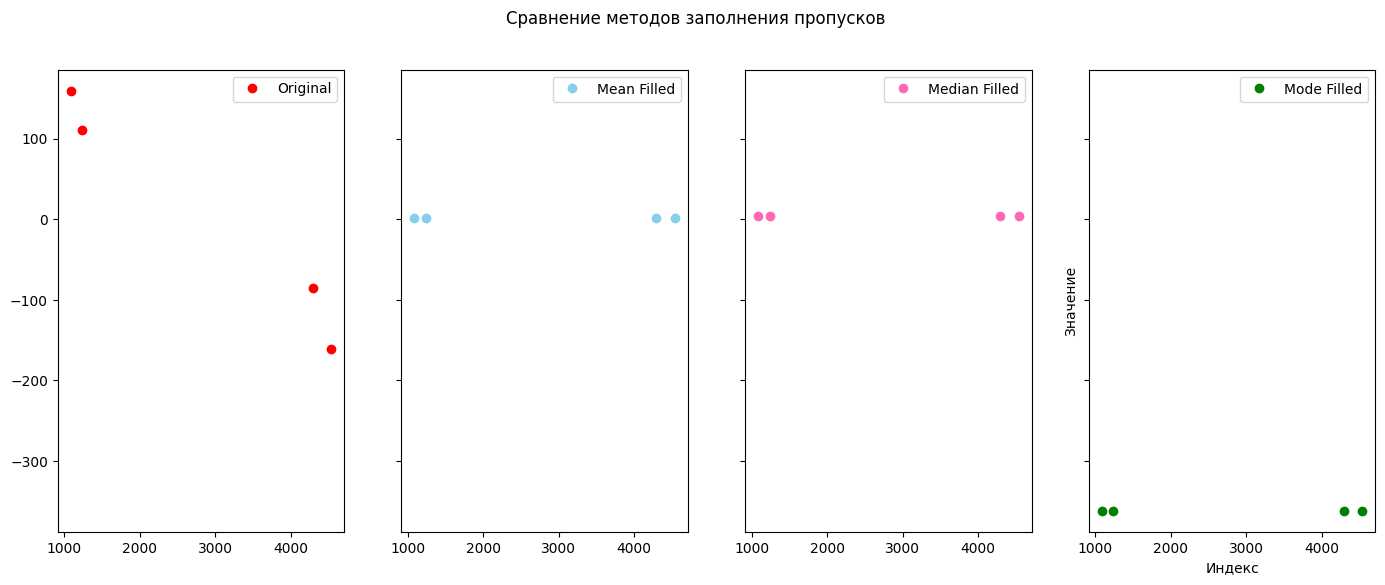

In [ ]:
# Заполнение пропусков различными методами - средним, медианой и модой
df_mean = df.copy()
print(df_mean['Value'].mean(), df_median['Value'].median(), df_mode['Value'].mode()[0])
df_mean['Value'] = df_mean['Value'].fillna(df_mean['Value'].mean())

df_median = df.copy()
df_median['Value'] = df_median['Value'].fillna(df_median['Value'].median())

df_mode = df.copy()
df_mode['Value'] = df_mode['Value'].fillna(df_mode['Value'].mode()[0])

# Строим графики для равнения результатов с истинными значениями
comparison = pd.DataFrame({
    'Original': data_orig['Value'],
    'Mean Filled': df_mean['Value'],
    'Median Filled': df_median['Value'],
    'Mode Filled': df_mode['Value'],
})
comparison_m = comparison.loc[rand_ind]
fig, axs = plt.subplots(1, 4, figsize=(17, 6), sharey=True)
fig.suptitle('Сравнение методов заполнения пропусков')

axs[0].plot(comparison_m['Original'], 'o', color='red', label='Original')
axs[0].legend()
axs[1].plot(comparison_m['Mean Filled'], 'o', label='Mean Filled', color='skyblue')
axs[1].legend()
axs[2].plot(comparison_m['Median Filled'], 'o', label='Median Filled', color='hotpink')
axs[2].legend()
axs[3].plot(comparison_m['Mode Filled'], 'o', label='Mode Filled', color='green')
axs[3].legend()
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

In [ ]:
# Заполнение пропусков различными методами - средним, медианой и модой
# Создаем исходные данные с выбросами
%%R
data_orig <- data.frame(Value = data)

data_orig$Value[rand_ind] <- NA  # Заменяем выбросы пропусками

# Заполнение пропусков различными методами
mean_value <- mean(data_orig$Value, na.rm = TRUE)
median_value <- median(data_orig$Value, na.rm = TRUE)
mode_value <- as.numeric(names(sort(table(data_orig$Value), decreasing = TRUE)[1]))

data_mean <- data_orig
data_median <- data_orig
data_mode <- data_orig

data_mean$Value[is.na(data_mean$Value)] <- mean_value
data_median$Value[is.na(data_median$Value)] <- median_value
data_mode$Value[is.na(data_mode$Value)] <- mode_value

# Вывод значений, использованных для заполнения
cat("Значение, использованное для заполнения средним:", mean_value, "\n")
cat("Значение, использованное для заполнения медианой:", median_value, "\n")
cat("Значение, использованное для заполнения модой:", mode_value, "\n")

# Сравнение данных и визуализация
comparison <- data.frame(
  Index = rand_ind,
  Original = data_orig$Value[rand_ind],
  Mean_Filled = data_mean$Value[rand_ind],
  Median_Filled = data_median$Value[rand_ind],
  Mode_Filled = data_mode$Value[rand_ind]
)


WARNING: R[write to console]: Error in `$<-.data.frame`(`*tmp*`, Value, value = c(50, -17.3505763004154,  : 
  replacement has 4556 rows, data has 25




Error in `$<-.data.frame`(`*tmp*`, Value, value = c(50, -17.3505763004154,  : 
  replacement has 4556 rows, data has 25


#6. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, ШапироУилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). Рассмотреть выборки малого (не более 50-100 элементов) и умеренного (1000-5000 наблюдений) объемов.
Сгенерируем 4 выборки с нормальным распределением, малого и умеренного размера и с разными математическим ожиданием и дисперсией

In [ ]:
data1 = np.random.normal(0, 15, 75)
data2 = np.random.normal(0, 6, 75)
data3 = np.random.normal(0, 200, 5000)
data4 = np.random.normal(0, 600, 2500)

In [ ]:
%%R
data1 <- c(rnorm(60, mean = 50, sd = 5))
data2 <- c(rnorm(85, mean = 600, sd = 200))
data3 <- c(rnorm(2000, mean = 1000, sd = 400))
data4 <- c(rnorm(4000, mean = 0, sd = 1000))
samples <- list(data1, data2, data3, data4)

Построим графики эмпирических функций распределений и квантилей

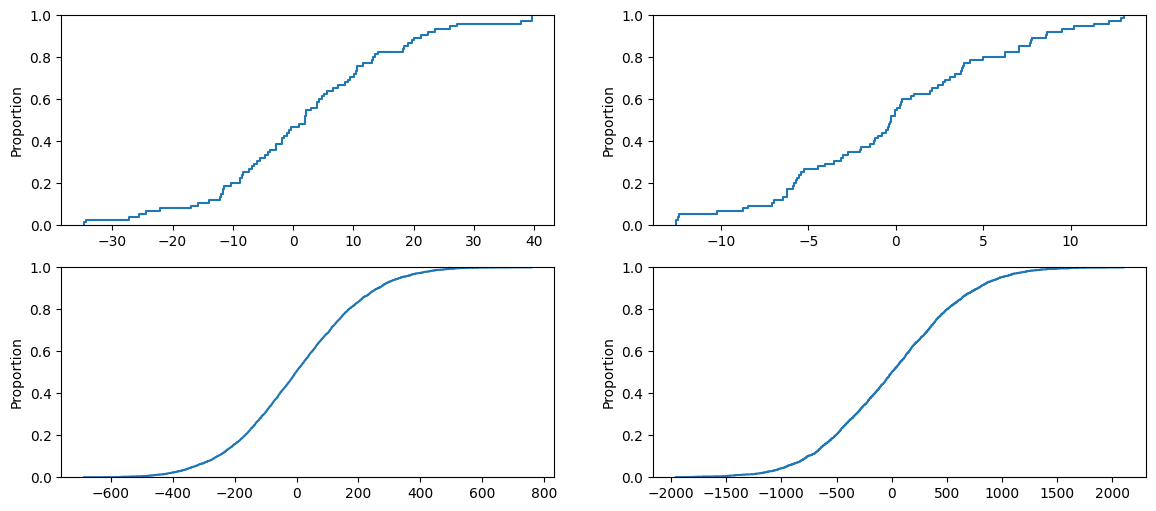

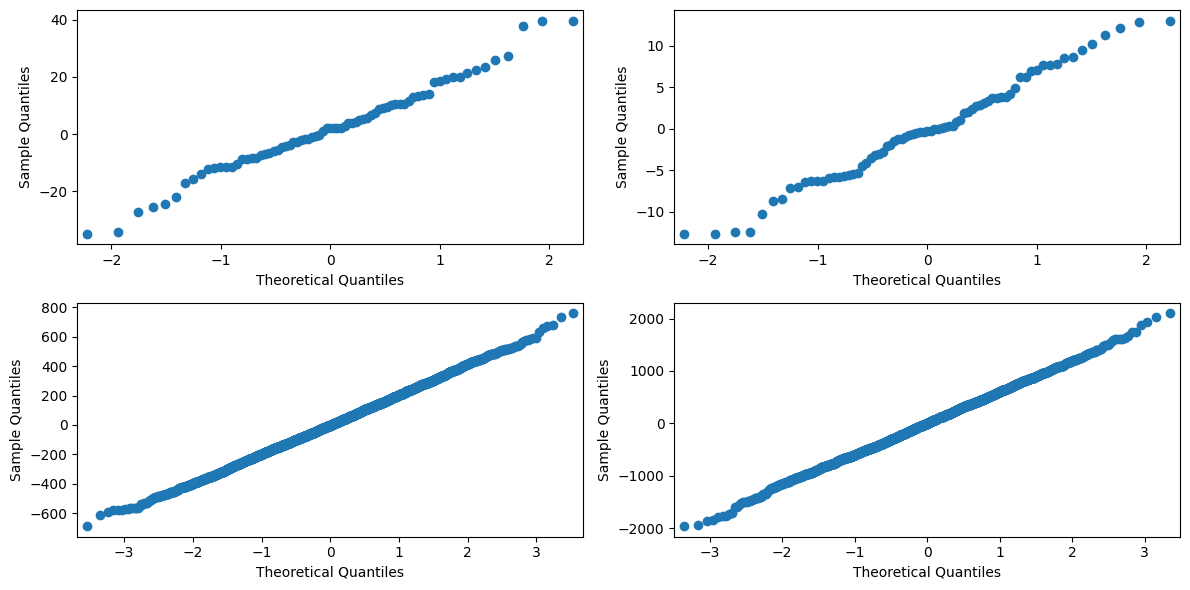

In [ ]:
plt.figure(figsize = (14,6))
plt.subplot(2,2,1)
sns.ecdfplot(data1)
plt.subplot(2,2,2)
sns.ecdfplot(data2)
plt.subplot(2,2,3)
sns.ecdfplot(data3)
plt.subplot(2,2,4)
sns.ecdfplot(data4)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
#plt.subplot(2,2,1)
sm.qqplot(data1, ax=axs[0, 0])
#plt.show()
#plt.subplot(2,2,2)
sm.qqplot(data2, ax=axs[0, 1])
#plt.show()
sm.qqplot(data3, ax=axs[1, 0])
#plt.subplot(2,2,3)
#plt.show()
#plt.subplot(2,2,4)
sm.qqplot(data4, ax=axs[1, 1])
plt.tight_layout()
plt.show()

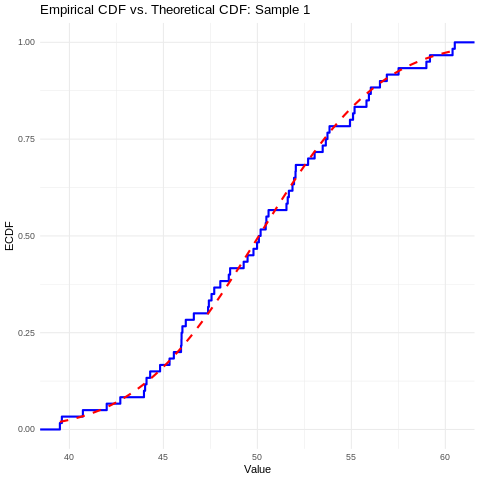

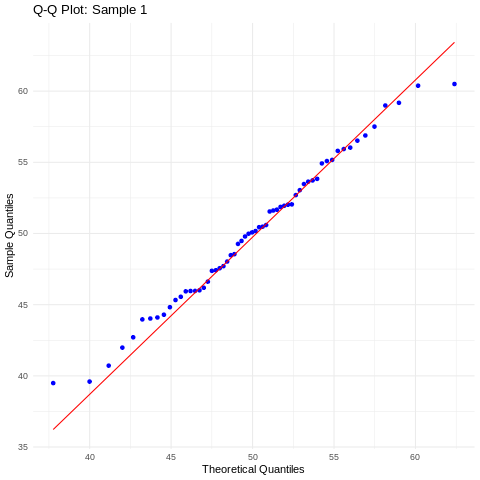

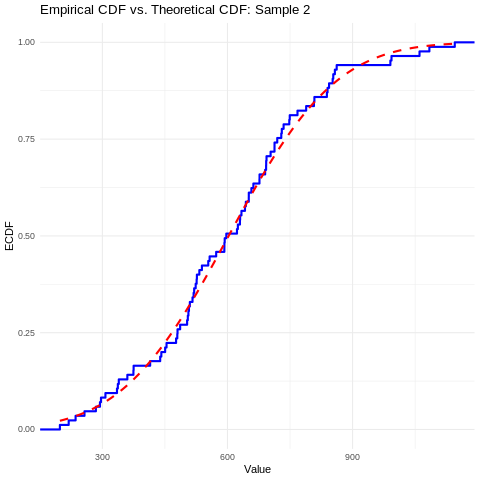

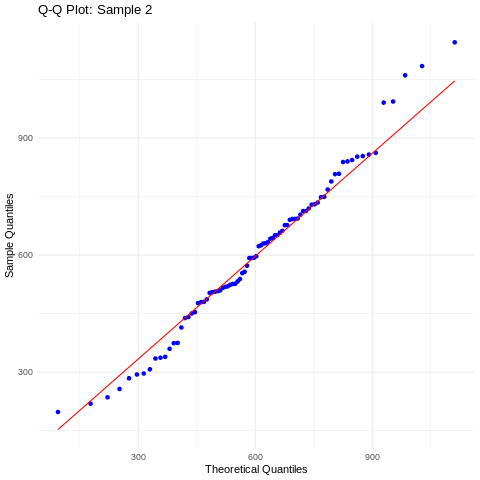

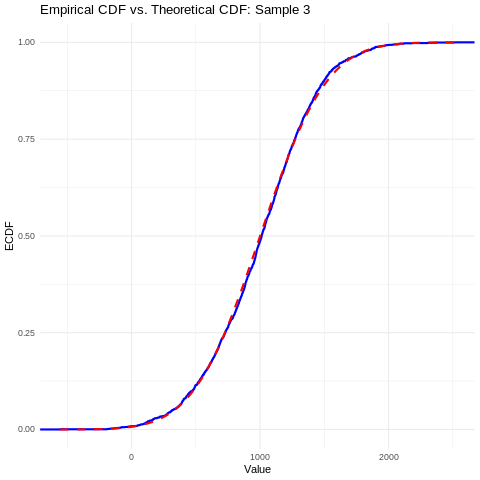

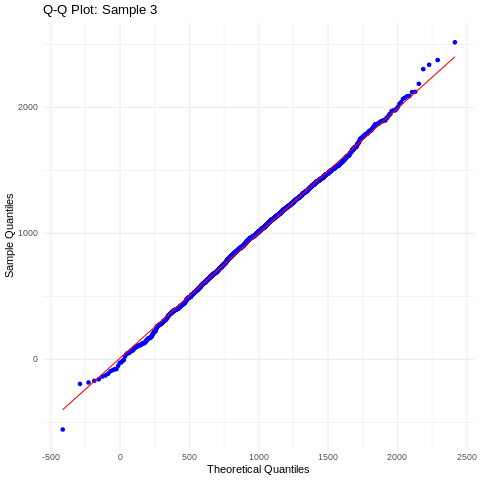

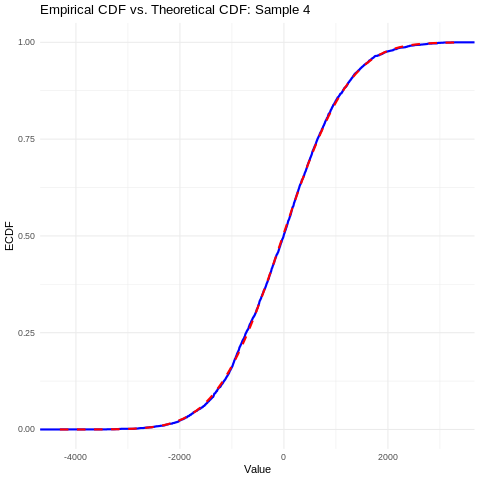

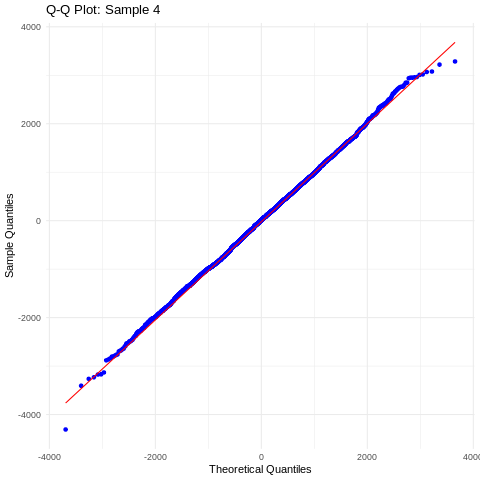

In [ ]:
%%R
plot_ecdf_qq <- function(sample, title){
  sample_df <- data.frame(sample = sample)
  #ECDF график
  ecdf_plot <- ggplot(sample_df, aes(x = sample)) +
    stat_ecdf(geom = "step", color = "blue", lwd = 1) +
    stat_function(fun = pnorm, args = list(mean = mean(sample), sd = sd(sample)),
                  color = "red", linetype = "dashed", lwd = 1) +
    labs(title = paste("Empirical CDF vs. Theoretical CDF:", title), x = "Value", y = "ECDF") +
    theme_minimal()
  print(ecdf_plot)

  # QQ график
  qq_plot <- ggplot(sample_df, aes(sample = sample)) +
    stat_qq(distribution = qnorm, dparams = list(mean = mean(sample), sd = sd(sample)), color = "blue") +
    stat_qq_line(distribution = qnorm, dparams = list(mean = mean(sample), sd = sd(sample)), color = "red") +
    labs(title = paste("Q-Q Plot:", title), x = "Theoretical Quantiles", y = "Sample Quantiles") +
    theme_minimal()
  print(qq_plot)
}
for (i in seq_along(samples)) {
  sample <- samples[[i]]
  # Построение графиков
  plot_ecdf_qq(sample, paste("Sample", i))
}

Тест Колмогорова-Смирнова:

In [ ]:
d_statistic, p_value = sc.stats.kstest(data1, 'norm')
print("One-sample KS Test, sample 1:")
print("D statistic:", d_statistic)
print("p-value:", p_value)
d_statistic, p_value = sc.stats.kstest(data2, 'norm')
print("One-sample KS Test, sample 2:")
print("D statistic:", d_statistic)
print("p-value:", p_value)
d_statistic, p_value = sc.stats.kstest(data3, 'norm')
print("One-sample KS Test, sample 3:")
print("D statistic:", d_statistic)
print("p-value:", p_value)
d_statistic, p_value = sc.stats.kstest(data4, 'norm')
print("One-sample KS Test, sample 4:")
print("D statistic:", d_statistic)
print("p-value:", p_value)

One-sample KS Test, sample 1:
D statistic: 0.5494412354522806
p-value: 8.70673684524062e-22
One-sample KS Test, sample 2:
D statistic: 0.39095889660908645
p-value: 7.735847333198526e-11
One-sample KS Test, sample 3:
D statistic: 0.49788279637391253
p-value: 0.0
One-sample KS Test, sample 4:
D statistic: 0.5167980193010474
p-value: 0.0


Тест Шапиро:


In [ ]:
statistic, p_value = sc.stats.shapiro(data1)
print("One-sample shapiro Test, sample 1:")
print("statistic:", statistic)
print("p-value:", p_value)
statistic, p_value = sc.stats.shapiro(data2)
print("One-sample shapiro Test, sample 2:")
print("statistic:", statistic)
print("p-value:", p_value)
statistic, p_value = sc.stats.shapiro(data3)
print("One-sample shapiro Test, sample 3:")
print("statistic:", statistic)
print("p-value:", p_value)
statistic, p_value = sc.stats.shapiro(data4)
print("One-sample shapiro Test, sample 4:")
print("statistic:", statistic)
print("p-value:", p_value)

One-sample shapiro Test, sample 1:
statistic: 0.986513838183439
p-value: 0.6117583414751077
One-sample shapiro Test, sample 2:
statistic: 0.9820408994944145
p-value: 0.36639358226897545
One-sample shapiro Test, sample 3:
statistic: 0.9996112593532203
p-value: 0.4458083998854664
One-sample shapiro Test, sample 4:
statistic: 0.9994849853834841
p-value: 0.7716990802760931


Тест Андерсона:

In [ ]:
print('data1, Anderson:', sc.stats.anderson(data1, 'norm'))
print('data2, Anderson:', sc.stats.anderson(data2, 'norm'))
print('data3, Anderson:', sc.stats.anderson(data3, 'norm'))
print('data4, Anderson:', sc.stats.anderson(data4, 'norm'))

data1, Anderson: AndersonResult(statistic=0.7308062544544356, critical_values=array([0.549, 0.625, 0.75 , 0.875, 1.041]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=2.3445579893764337, scale=15.147083084585931)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
data2, Anderson: AndersonResult(statistic=0.18570700259159878, critical_values=array([0.549, 0.625, 0.75 , 0.875, 1.041]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.08306620786990343, scale=6.1992625142926965)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
data3, Anderson: AndersonResult(statistic=0.18705325298742537, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.6491579923057402, scale=199.29274201971617)
 success: True
 message: '`anderson` succ

Тест Крамера фон Мизеса:

In [ ]:
print('data1, ', sc.stats.cramervonmises(data1, 'norm'))
print('data2, ', sc.stats.cramervonmises(data2, 'norm'))
print('data3, ', sc.stats.cramervonmises(data3, 'norm'))
print('data4, ', sc.stats.cramervonmises(data4, 'norm'))

data1,  CramerVonMisesResult(statistic=6.193368276272132, pvalue=1.511324398961733e-11)
data2,  CramerVonMisesResult(statistic=4.042331180609428, pvalue=6.083011871993449e-11)
data3,  CramerVonMisesResult(statistic=411.6176236894465, pvalue=1.0144740303363875e-07)
data4,  CramerVonMisesResult(statistic=208.26281553694872, pvalue=7.686394565276089e-08)


Тест Лилифорса:

In [ ]:
print('data1', sm.stats.diagnostic.lilliefors(data1, 'norm'))
print('data2', sm.stats.diagnostic.lilliefors(data2 , 'norm'))
print('data3', sm.stats.diagnostic.lilliefors(data3, 'norm'))
print('data4', sm.stats.diagnostic.lilliefors(data4 , 'norm'))

data1 (0.08406166175998153, 0.263582697055303)
data2 (0.04668046741732523, 0.9681505736255264)
data3 (0.00853455664603664, 0.5094120724038482)
data4 (0.016775664625643505, 0.09254598884257557)


In [ ]:
from statsmodels.stats.diagnostic import normal_ad
stat, p_value = normal_ad(data1)

print(f"Статистика: {stat:.4f}, P-значение: {p_value:.4f}")
stat, p_value = normal_ad(data2)

print(f"Статистика: {stat:.4f}, P-значение: {p_value:.4f}")
stat, p_value = normal_ad(data3)

print(f"Статистика: {stat:.4f}, P-значение: {p_value:.4f}")
stat, p_value = normal_ad(data4)

print(f"Статистика: {stat:.4f}, P-значение: {p_value:.4f}")


Статистика: 0.7308, P-значение: 0.0544
Статистика: 0.1857, P-значение: 0.9032
Статистика: 0.1871, P-значение: 0.9042
Статистика: 0.4359, P-значение: 0.2981


То же самое на R:

In [ ]:
%%R
for (i in seq_along(samples)) {
  # Тесты на нормальность
  print(paste("====Sample", i,"==== "))
  print("Kolmogorov-Smirnov Test:")
  print(ks.test(samples[[i]], "pnorm", mean = mean(samples[[i]]), sd = sd(samples[[i]])))

  print("Shapiro-Wilk Test:")
  print(shapiro.test(samples[[i]]))

  print("Anderson-Darling Test:")
  print(ad.test(samples[[i]]))

  print("Cramer-von Mises Test:")
  print(cvm.test(samples[[i]]))

  print("Lilliefors Test:")
  print(lillie.test(samples[[i]]))

  print("Shapiro-Francia Test:")
  print(sf.test(samples[[i]]))
}

[1] "====Sample 1 ==== "
[1] "Kolmogorov-Smirnov Test:"

	Exact one-sample Kolmogorov-Smirnov test

data:  samples[[i]]
D = 0.058489, p-value = 0.979
alternative hypothesis: two-sided

[1] "Shapiro-Wilk Test:"

	Shapiro-Wilk normality test

data:  samples[[i]]
W = 0.98702, p-value = 0.7738

[1] "Anderson-Darling Test:"

	Anderson-Darling normality test

data:  samples[[i]]
A = 0.16049, p-value = 0.9453

[1] "Cramer-von Mises Test:"

	Cramer-von Mises normality test

data:  samples[[i]]
W = 0.023143, p-value = 0.9319

[1] "Lilliefors Test:"

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  samples[[i]]
D = 0.058489, p-value = 0.8774

[1] "Shapiro-Francia Test:"

	Shapiro-Francia normality test

data:  samples[[i]]
W = 0.99269, p-value = 0.9419

[1] "====Sample 2 ==== "
[1] "Kolmogorov-Smirnov Test:"

	Exact one-sample Kolmogorov-Smirnov test

data:  samples[[i]]
D = 0.048054, p-value = 0.9842
alternative hypothesis: two-sided

[1] "Shapiro-Wilk Test:"

	Shapiro-Wilk normality tes

То же самое на моих данных:

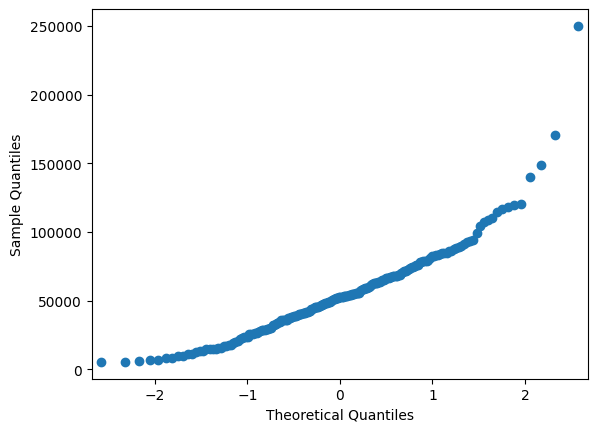

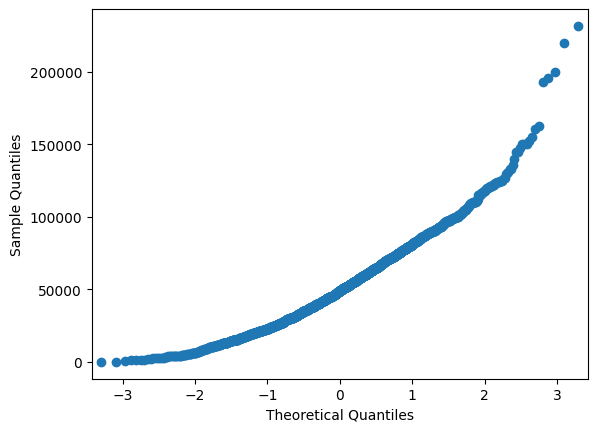

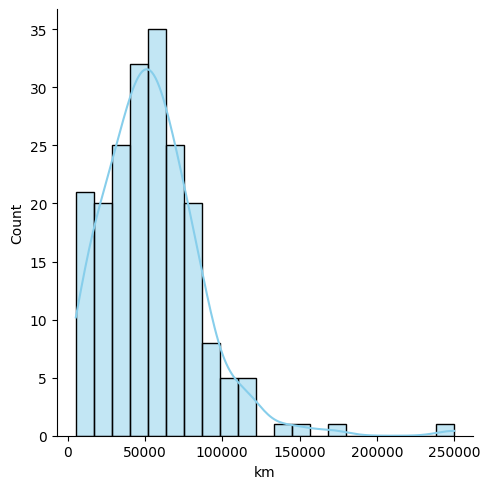

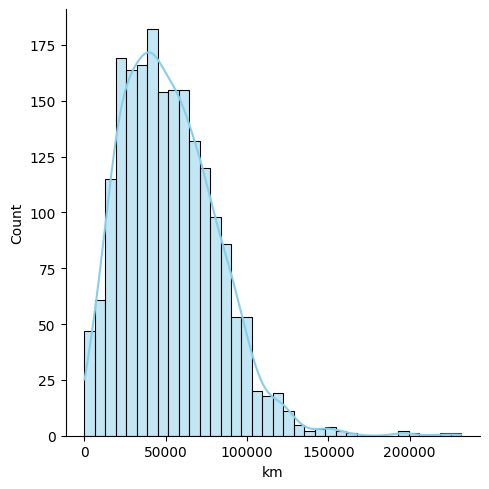

One-sample KS Test:
D statistic: 1.0
p-value: 0.0
One-sample shapiro Test:
statistic: 1.0
p-value: 4.5964934875564145e-10
kms,  CramerVonMisesResult(statistic=66.66666666666667, pvalue=0)
One-sample KS Test:
D statistic: 0.9995
p-value: 0.0
One-sample shapiro Test:
statistic: 0.9995
p-value: 1.751179613359342e-23
kms,  CramerVonMisesResult(statistic=665.9169166666667, pvalue=1.8916370703170315e-07)


In [ ]:
# Выборка 200 случайных значений
kms_200 = kms.sample(n=200)

# Выборка 2000 случайных значений
kms_2000 = kms.sample(n=2000)
sm.qqplot(kms_200)
plt.show()
sm.qqplot(kms_2000)
plt.show()
sns.displot(x = kms_200, data = pd.DataFrame(kms_200), kde = True, color = 'skyblue')
plt.show()
sns.displot(x = kms_2000, data = pd.DataFrame(kms_2000), kde = True, color = 'skyblue')
plt.show()

d_statistic, p_value = sc.stats.kstest(kms_200, 'norm')
print("One-sample KS Test:")
print("D statistic:", d_statistic)
print("p-value:", p_value)
statistic, p_value = sc.stats.shapiro(kms_200)
print("One-sample shapiro Test:")
print("statistic:", d_statistic)
print("p-value:", p_value)
print('kms, ', sc.stats.cramervonmises(kms_200, 'norm'))


d_statistic, p_value = sc.stats.kstest(kms_2000, 'norm')
print("One-sample KS Test:")
print("D statistic:", d_statistic)
print("p-value:", p_value)
statistic, p_value = sc.stats.shapiro(kms_2000)
print("One-sample shapiro Test:")
print("statistic:", d_statistic)
print("p-value:", p_value)
print('kms, ', sc.stats.cramervonmises(kms_2000, 'norm'))

[1] "Shapiro-Wilk Test:"

	Shapiro-Wilk normality test

data:  data_100
W = 0.88336, p-value = 2.476e-11

[1] "Anderson-Darling Test:"

	Anderson-Darling normality test

data:  data_100
A = 2.6553, p-value = 1.025e-06

[1] "Cramer-von Mises Test:"

	Cramer-von Mises normality test

data:  data_100
W = 0.37112, p-value = 5.261e-05

[1] "Lilliefors Test:"

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_100
D = 0.093584, p-value = 0.0002104

[1] "Shapiro-Francia Test:"

	Shapiro-Francia normality test

data:  data_100
W = 0.8778, p-value = 3.137e-10

[1] "Shapiro-Wilk Test:"

	Shapiro-Wilk normality test

data:  data_1000
W = 0.95262, p-value < 2.2e-16

[1] "Anderson-Darling Test:"

	Anderson-Darling normality test

data:  data_1000
A = 13.777, p-value < 2.2e-16

[1] "Cramer-von Mises Test:"

	Cramer-von Mises normality test

data:  data_1000
W = 2.0207, p-value = 7.37e-10

[1] "Lilliefors Test:"

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data_1000
D = 0.05451,

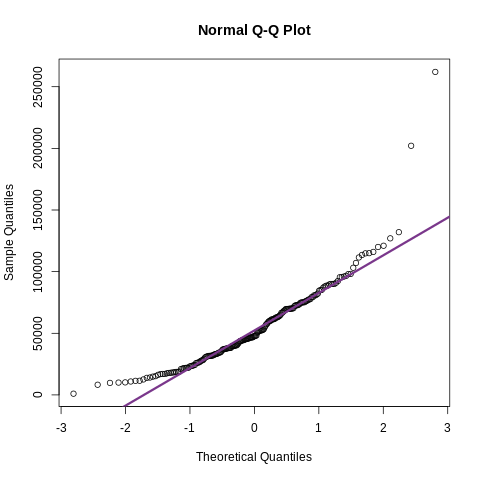

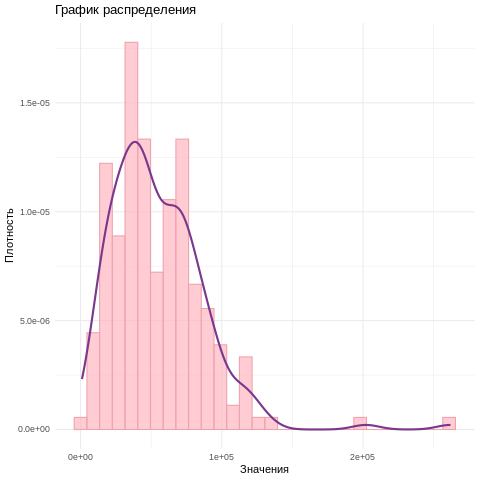

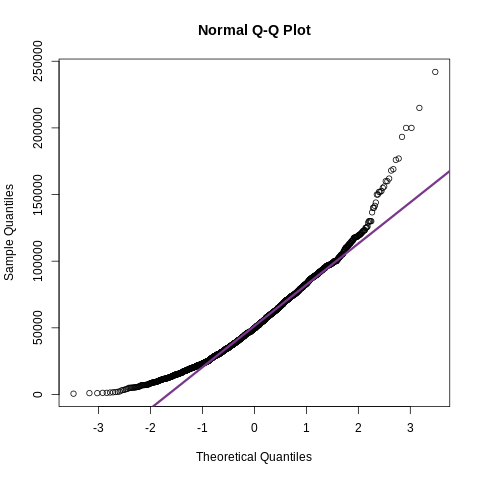

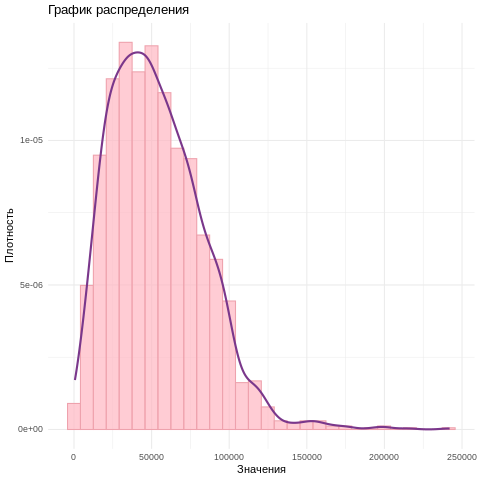

In [ ]:
%%R
data = df$km

data_100 = sample(data,200)
sample_100 <- df[sample(data, 200), ]


data_1000 = sample(data,2000)
sample_1000 <- df[sample(data, 2000), ]

qq_envelope <- function(data, df, title) {
  # Построение qq-графика
  qq_plot <- qqnorm(data)
  qqline(data, col = "mediumorchid4", lwd = 3)

  p <- ggplot(df, aes(x = data)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "lightpink", color = "lightpink2", alpha = 0.7) +  # Гистограмма
  geom_density(color = "mediumorchid4", lwd = 1) +  # Линия плотности
  labs(title = "График распределения", x = "Значения", y = "Плотность") +  # Заголовки
  theme_minimal()
  print(p)


}

qq_envelope(data_100, sample_100, "Малая выборка")

qq_envelope(data_1000, sample_1000, "Умеренная выборка")

# Тесты на нормальность

print("Shapiro-Wilk Test:")
print(shapiro.test(data_100))

print("Anderson-Darling Test:")
print(ad.test(data_100))

print("Cramer-von Mises Test:")
print(cvm.test(data_100))
print("Lilliefors Test:")
print(lillie.test(data_100))

print("Shapiro-Francia Test:")
print(sf.test(data_100))


print("Shapiro-Wilk Test:")
print(shapiro.test(data_1000))

print("Anderson-Darling Test:")
print(ad.test(data_1000))

print("Cramer-von Mises Test:")
print(cvm.test(data_1000))
print("Lilliefors Test:")
print(lillie.test(data_1000))

print("Shapiro-Francia Test:")
print(sf.test(data_1000))

# 1. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:
*   Стьюдента, включая односторонние варианты, когда проверяемая нулевая
гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности;
*    Уилкоксона-Манна-Уитни (ранговые);
*   Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий).


---


In [ ]:
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
from pingouin import ttest

# Генерация данных
np.random.seed(42)
sample1 = np.random.normal(6, 25, 400)
sample2 = np.random.normal(0, 13, 400)

In [ ]:
ttest(sample1, sample2, alternative = 'two-sided', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,5.165587,798,two-sided,3.030022e-07,"[4.810796126035477, 9.313583467088504]",0.365262,3.2e+04,0.999311


In [ ]:
ttest(sample1, sample2, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.165587,798,two-sided,3.030022e-07,"[4.38, 9.75]",0.365262,3.2e+04,0.999311


In [ ]:
ttest(sample1, sample2, alternative = 'two-sided', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.165587,798,two-sided,3.030022e-07,"[3.5321737367349435, 10.592205856389038]",0.365262,3.2e+04,0.999311


In [ ]:
ttest(sample1, sample2, alternative = 'less', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,5.165587,798,less,1.0,"[-inf, 8.815728986815026]",0.365262,1.562e-05,5.014988e-12


In [ ]:
ttest(sample1, sample2, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.165587,798,greater,1.515011e-07,"[4.81, inf]",0.365262,6.4e+04,0.999781


In [ ]:
ttest(sample1, sample2, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.165587,798,greater,1.515011e-07,"[3.8752961879034533, inf]",0.365262,6.4e+04,0.999781


In [ ]:
from math import ceil
# Оценка мощности t-теста
effect_size = 0.5  # Размер эффекта (разница средних значений / стандартное отклонение)
alpha = 0.05  # Уровень значимости
power = 0.8  # Заданная мощность

# Оценка мощности для заданного объема выборки
analysis = TTestIndPower()

# Определение объема выборки для достижения заданной мощности
confidence_levels = [0.9, 0.95, 0.99]

# Применение t-теста для различных доверительных уровней
for confidence_level in confidence_levels:
    alpha = 1 - confidence_level
    sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
    print(f"Объем выборки для достижения мощности {power:.2f} при уровне значимости {alpha:.2f}: {ceil(sample_size)}")

    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    print(f"Двусторонний t-тест при доверительном уровне {confidence_level}: t-статистика = {t_stat},  p-значение = {p_value}, критическое значение = {stats.t.ppf(1 - alpha / 2, df=198)}")



Объем выборки для достижения мощности 0.80 при уровне значимости 0.10: 51
Двусторонний t-тест при доверительном уровне 0.9: t-статистика = 5.1655867934875195,  p-значение = 3.030021630709247e-07, критическое значение = 1.6525857836172075
Объем выборки для достижения мощности 0.80 при уровне значимости 0.05: 64
Двусторонний t-тест при доверительном уровне 0.95: t-статистика = 5.1655867934875195,  p-значение = 3.030021630709247e-07, критическое значение = 1.9720174778338955
Объем выборки для достижения мощности 0.80 при уровне значимости 0.01: 96
Двусторонний t-тест при доверительном уровне 0.99: t-статистика = 5.1655867934875195,  p-значение = 3.030021630709247e-07, критическое значение = 2.6008872779626224


In [ ]:
%%R
# Пример данных
set.seed(123)
sample1 <- rnorm(400, mean = 6, sd = 25)  # Первая выборка
sample2 <- rnorm(400, mean = 0, sd = 13)  # Вторая выборка

# Двусторонний t-тест
t_test_95 <- t.test(sample1, sample2, alternative = "two.sided", conf.level = 0.95)
t_test_99 <- t.test(sample1, sample2, alternative = "two.sided", conf.level = 0.99)
t_test_90 <- t.test(sample1, sample2, alternative = "two.sided", conf.level = 0.90)

# Односторонний t-тест (среднее sample1 меньше sample2)
t_test_one_sided <- t.test(sample1, sample2, alternative = "less", conf.level = 0.95)

# Результаты t-тестов
print("Двусторонний t-тест (95% доверительный интервал):")
print(t_test_95)
print("Двусторонний t-тест (99% доверительный интервал):")
print(t_test_99)
print("Двусторонний t-тест (90% доверительный интервал):")
print(t_test_90)
print("Односторонний t-тест (sample1 меньше sample2):")
print(t_test_one_sided)

# Гипотеза: Среднее sample2 > sample1, alpha = 0.05
effect_size <- (mean(sample2) - mean(sample1)) / sd(c(sample1, sample2))  # Эффект размер (Cohen's d)
power_analysis <- pwr.t.test(n = length(sample1), d = effect_size, sig.level = 0.05, type = "two.sample", alternative = "greater")

print("Оценка мощности критерия:")
print(power_analysis)

# 3. Определение объема выборки для заданной мощности
# Требуемая мощность = 0.8, alpha = 0.05, двусторонний тест
required_sample_size <- pwr.t.test(power = 0.8, d = effect_size, sig.level = 0.05, type = "two.sample", alternative = "two.sided")
required_sample_size <- pwr.t.test(power = 0.8, d = effect_size, sig.level = 0.01, type = "two.sample", alternative = "two.sided")


print("Необходимый объем выборки для достижения мощности 0.8:")
print(required_sample_size)

[1] "Двусторонний t-тест (95% доверительный интервал):"

	Welch Two Sample t-test

data:  sample1 and sample2
t = 4.629, df = 609.15, p-value = 4.494e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.658902 9.051292
sample estimates:
 mean of x  mean of y 
6.41938320 0.06428621 

[1] "Двусторонний t-тест (99% доверительный интервал):"

	Welch Two Sample t-test

data:  sample1 and sample2
t = 4.629, df = 609.15, p-value = 4.494e-06
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 2.807623 9.902571
sample estimates:
 mean of x  mean of y 
6.41938320 0.06428621 

[1] "Двусторонний t-тест (90% доверительный интервал):"

	Welch Two Sample t-test

data:  sample1 and sample2
t = 4.629, df = 609.15, p-value = 4.494e-06
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 4.093435 8.616759
sample estimates:
 mean of x  mean of y 
6.41938320 0.

Применим критерий Манна-Уитни для сравнения средних значений выборок цен на автомобили марок BMW и Audi. Нулевая гипотеза двухстороннего теста - средние не равны, одностороннего - средняя цена на автомобиль марки BMW больше, чем на автомобиль марки Audi

In [ ]:
from scipy.stats import mannwhitneyu # критерий Уилкоксона-Манна-Уитни
import statistics # mean и т.д.

bmw_prices = data.loc[data['brand'] == 'bmw', 'price']
audi_prices = data.loc[data['brand'] == 'audi', 'price']

print('mean(X) =', statistics.mean(bmw_prices),
      'vs mean(Y) =', statistics.mean(audi_prices))

_, pvalue = mannwhitneyu(bmw_prices, audi_prices, alternative = 'two-sided')
print('E(X) != E(Y):   pvalue =', pvalue)

_, pvalue = mannwhitneyu(bmw_prices, audi_prices, alternative = 'greater')
print('E(X) < E(Y):   pvalue =', pvalue)

_, pvalue = mannwhitneyu(bmw_prices, audi_prices, alternative = 'less')
print('E(X) > E(Y):   pvalue =', pvalue)

mean(X) = 2429280.303030303 vs mean(Y) = 2533600.0
E(X) != E(Y):   pvalue = 0.09859715011849948
E(X) < E(Y):   pvalue = 0.9507648225425709
E(X) > E(Y):   pvalue = 0.04929857505924974


In [ ]:
%%R
bmw_prices <- df %>% filter(brand == 'bmw') %>% pull(price)
audi_prices <- df %>% filter(brand == 'audi') %>% pull(price)

mean_bmw <- mean(bmw_prices)
mean_audi <- mean(audi_prices)

cat("E(X) =", mean(bmw_prices),
    "vs E(Y) =", mean(audi_prices))

cat("\nE(X) == E(Y)\n")
wilcox.test(bmw_prices, audi_prices, paired = FALSE, alternative = "two.sided")

E(X) = 2429280 vs E(Y) = 2533600
E(X) == E(Y)

	Wilcoxon rank sum test with continuity correction

data:  bmw_prices and audi_prices
W = 28364, p-value = 0.0986
alternative hypothesis: true location shift is not equal to 0



Получили, что для уровня доверия 0.99 можно принять гипотезу о том, что E(bmw) > Eaudi), а о равенстве - с уровнем доверия 0.95 и 0.99



In [ ]:
%%R
cat("\nE(X) < E(Y)\n")
wilcox.test(bmw_prices, audi_prices, paired = FALSE, alternative = "greater")


E(X) < E(Y)

	Wilcoxon rank sum test with continuity correction

data:  bmw_prices and audi_prices
W = 28364, p-value = 0.9508
alternative hypothesis: true location shift is greater than 0



In [ ]:
%%R
cat("\nE(X) > E(Y)\n")
wilcox.test(bmw_prices,audi_prices, paired = FALSE, alternative = "less")


E(X) > E(Y)

	Wilcoxon rank sum test with continuity correction

data:  bmw_prices and audi_prices
W = 28364, p-value = 0.0493
alternative hypothesis: true location shift is less than 0



Перейдем к проверке гипотез об однородности дисперсий.
Критерий Фишера применим только к нормально распределенным данным, поэтому снова используем выборки sample1 и sample2.

In [ ]:
from scipy.stats import f
# Вычисление дисперсий
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

# Выполнение F-теста
f_stat = var1 / var2
p_value = 2 * min(f.cdf(f_stat, dfn=len(sample1)-1, dfd=len(sample2)-1), 1 - f.cdf(f_stat, dfn=len(sample1)-1, dfd=len(sample2)-1))

print(f"F-статистика: {f_stat}")
print(f"p-значение: {p_value}")

F-статистика: 3.364924130053879
p-значение: 2.220446049250313e-16


In [ ]:
%%R
var1 <- var(sample1)
var2 <- var(sample2)

f_stat <- var1 / var2
dfn <- length(sample1) - 1
dfd <- length(sample2) - 1
p_value <- 2 * min(pf(f_stat, dfn, dfd), 1 - pf(f_stat, dfn, dfd))

cat("F-статистика:", f_stat, "\n")
cat("p-значение:", p_value, "\n")

F-статистика: 3.512629 
p-значение: 0 


Тест Левене также параметрический (предполагает нормальное распределение), зато может быть применим к более чем двум выборкам. Создадим выборку sample3  с такой же дисперсией, как у sample2

In [ ]:
sample3 = np.random.normal(5, 13, 400)
stat, p_value = stats.levene(sample2, sample3)
print(f"Тест Левене: статистика = {stat}, p-значение = {p_value}")
stat, p_value = stats.levene(sample1, sample2)
print(f"Тест Левене: статистика = {stat}, p-значение = {p_value}")

Тест Левене: статистика = 0.06726084713661523, p-значение = 0.7954344360159978
Тест Левене: статистика = 105.1230649408929, p-значение = 2.95070832193727e-23


In [ ]:
%%R
sample3 <- rnorm(400, mean = 5, sd = 13)
data <- data.frame(
  values = c(sample2, sample3),
  group = factor(rep(1:2, each = 100))
)

levene_result <- leveneTest(values ~ group, data = data)
print(levene_result)

Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  1.5822 0.2088
      798               


Видим, что с любым уровнем доверия из предложенных тест Левене теорию о равенстве дисперсий не отвергает для sample2 и sample3 и отвергает для sample1, sample2 и sample3.




Тест Барлетта аналогично тесту Левене параметрический и может быть применим к более чем двум выборкам одновременно. Применим его к тем же данным:

In [ ]:
stat, p_value = stats.bartlett(sample2, sample3)
print(f"Тест Бартлетта: статистика = {stat}, p-значение = {p_value}")
stat, p_value = stats.bartlett(sample1, sample2, sample3)
print(f"Тест Бартлетта: статистика = {stat}, p-значение = {p_value}")

Тест Бартлетта: статистика = 0.0799592638137308, p-значение = 0.777352622776952
Тест Бартлетта: статистика = 216.44560199192608, p-значение = 9.986992215038197e-48


In [ ]:
%%R
bartlett.test(list(sample1, sample2, sample3))


	Bartlett test of homogeneity of variances

data:  list(sample1, sample2, sample3)
Bartlett's K-squared = 215.52, df = 2, p-value < 2.2e-16



In [ ]:
%%R
bartlett.test(list(sample2, sample3))


	Bartlett test of homogeneity of variances

data:  list(sample2, sample3)
Bartlett's K-squared = 0.40569, df = 1, p-value = 0.5242



Все еще с любым из требуемых уровней доверия результат совпадает с реальностью, но стоит заметить, что p-value уменьшился аж в 2 раза.

Тест Флингера-Килина непараметрический. Сравним на моих данных дисперсию для пробега автомобилей марок nissan и honda

In [ ]:
nissan_km = data.loc[data['brand'] == 'nissan', 'km']
honda_km = data.loc[data['brand'] == 'honda', 'km']
stat, p_value = stats.fligner(nissan_km, honda_km)

print(f"Тест Флигнера-Килина: статистика = {stat}, p-значение = {p_value}")

Тест Флигнера-Килина: статистика = 4.144687534875316, p-значение = 0.041765362840962716


In [ ]:
%%R
nissan_km <- df %>% filter(brand == 'nissan') %>% pull(km)
honda_km <- df %>% filter(brand == 'honda') %>% pull(km)

km_values <- c(nissan_km, honda_km)
groups <- factor(c(rep("Nissan", length(nissan_km)), rep("Honda", length(honda_km))))
result <- fligner.test(km_values, groups)

print(result)


	Fligner-Killeen test of homogeneity of variances

data:  km_values and groups
Fligner-Killeen:med chi-squared = 4.1447, df = 1, p-value = 0.04177



# 2. Исследовать корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

Будем исследовать влияние различных факторов на пробег автомобилей, продающихся в Мумбае(самый населенный город Индии).

In [ ]:
from scipy.stats import pearsonr
np.random.seed(42)

# Генерация выборки из нормального распределения
n = 100
x = np.random.normal(0, 1, n)
eps = np.random.uniform(-0.3, 0.3, n)
y = x + eps
data1 = pd.DataFrame({'X': x, 'Y': y})
pearson_corr = data1.corr(method='pearson').iloc[0, 1]
print(f"Pearson correlation: {pearson_corr}")


Pearson correlation: 0.98345468794048


In [ ]:
%%R
set.seed(42)
n <- 100
x <- rnorm(n)
eps <- runif(n, -0.3, 0.3)
y <- x + eps

# Создание data frame
data <- data.frame(X = x, Y = y)

# Вычисление коэффициентов корреляции
pearson_corr <- cor(data$X, data$Y, method = "pearson")
cat("Pearson correlation:", pearson_corr, "\n")


Pearson correlation: 0.9870782 


Теперь посмотрим как на пробег влияет количество место в автомобиле и заодно посчитаем коэффициент для пробега и возраста, как выше:

In [ ]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(klm, age)
print(f"Коэффициент корреляции Спирмена между пробегом и возрастом: {spearman_corr}")
klm = klm[:789]
sts = data['engine'].where(data['location']=='mumbai').dropna()
spearman_corr, _ = spearmanr(klm, sts)
print(f"Коэффициент корреляции Спирмена между пробегом и вместительностью: {spearman_corr}")

Коэффициент корреляции Спирмена между пробегом и возрастом: 0.6232688522512732
Коэффициент корреляции Спирмена между пробегом и вместительностью: 0.26565697398283283


In [ ]:
%%R
spearman_corr <- cor(klm, age, method = "spearman")
cat(sprintf("Коэффициент корреляции Спирмена между feature1 и feature2: %.2f\n", spearman_corr))
klm <- klm[1:789]
sts <- df$engine[df$location == "mumbai"]
sts <- na.omit(sts[1:789])
spearman_corr <- cor(klm, sts, method = "spearman")
cat(sprintf("Коэффициент корреляции Спирмена между feature1 и feature2: %.2f\n", spearman_corr))

Коэффициент корреляции Спирмена между feature1 и feature2: 0.62
Коэффициент корреляции Спирмена между feature1 и feature2: 0.27


Для пробега от возраста коэффициент Спирмена чуть больше, чем коэффициент Пирсона, но примерно такой же. Для пробега от мощности двигателя коэффициент ниже, что делает линейную зависимость еще более незаметной.

Для уровня доверия 0.99 можем принять гипотезу, для 0.9 b 0.95 - отвергаем.

Посчитаем коэффициент Кенделла для отношений выше и для зависимости цены от пробега:

In [ ]:
from scipy.stats import kendalltau

prc = data['price'].where(data['location'] == 'mumbai').dropna()
age = age[:789]
pwr = prc = data['power'].where(data['location'] == 'mumbai').dropna()

kendall_corr, _ = kendalltau(prc, pwr)
print(f"Коэффициент корреляции Кендалла между feature1 и feature2: {kendall_corr}")
kendall_corr, _ = kendalltau(klm, sts)
print(f"Коэффициент корреляции Кендалла между feature1 и feature2: {kendall_corr}")
kendall_corr, _ = kendalltau(klm, age)
print(f"Коэффициент корреляции Кендалла между feature1 и feature2: {kendall_corr}")

Коэффициент корреляции Кендалла между feature1 и feature2: 1.0
Коэффициент корреляции Кендалла между feature1 и feature2: 0.18495913110854753
Коэффициент корреляции Кендалла между feature1 и feature2: 0.4704812539777761


In [ ]:
%%R
prc <- df$price[df$location == "mumbai"]
pwr <- df$power[df$location == "mumbai"]

prc <- na.omit(prc)
pwt <-na.omit(pwr)
klm <- na.omit(klm[1:789])
sts <- na.omit(sts[1:789])
age <- na.omit(age[1:789])
min_length <- min(length(prc), length(pwr))
prc <- prc[1:min_length]
pwr <- pwr[1:min_length]
kendall_corr <- cor(prc, pwr, method = "kendall")
cat(sprintf("Коэффициент корреляции Кендалла между feature1 и feature2: %.2f\n", kendall_corr))

kendall_corr <- cor(klm, sts, method = "kendall")
cat(sprintf("Коэффициент корреляции Кендалла между feature1 и feature2: %.2f\n", kendall_corr))

kendall_corr <- cor(klm, age, method = "kendall")
cat(sprintf("Коэффициент корреляции Кендалла между feature1 и feature2: %.2f\n", kendall_corr))

Коэффициент корреляции Кендалла между feature1 и feature2: NA
Коэффициент корреляции Кендалла между feature1 и feature2: 0.18
Коэффициент корреляции Кендалла между feature1 и feature2: 0.47


# 3. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.


Применим метод хи-квадрат для сравнения рынка в Мумбае и Хайдарабаде. Для этого предварительно посчитаем квантили цены для всего датасета и сопоставлять будем по числу цен на автомобили, попавших в соответствующие квантили


---

Хайдарабад - город на юге Индии, административный центр одного из штатов. Население - около 10 миллион человек (В Мумбае 13 млн). В Хайдарабаде находится много промышленных предприятий, а также научно-исследовательских предприятий ОПК и много IT-компаний, что делает Хайдарабад, как и Мумбаи, одним из наиболее богатых городов Индии, поэтому и можем предположить, что рынок там будет схожим.

In [ ]:
data = data.dropna(subset=['price'])
quantiles = data['price'].quantile([0.25, 0.5, 0.75])
quantiles = data['price'].quantile([0.25, 0.5, 0.75])

print(f"25th percentile (Q1): {quantiles[0.25]}")
print(f"50th percentile (Median): {quantiles[0.5]}")
print(f"75th percentile (Q3): {quantiles[0.75]}")

matrix = pd.DataFrame(index=['mumbai', 'hyderabad'], columns=['Q1', 'Q2', 'Q3', 'Q4'])
matrix.fillna(0, inplace=True)

for index, row in data.iterrows():
    price = row['price']
    city = row['location']
    if city=='hyderabad' or city == 'mumbai':
        if price <= quantiles[0.25]:
            matrix.loc[city, 'Q1'] += 1
        elif price <= quantiles[0.5]:
            matrix.loc[city, 'Q2'] += 1
        elif price <= quantiles[0.75]:
            matrix.loc[city, 'Q3'] += 1
        else:
            matrix.loc[city, 'Q4'] += 1

print(matrix)
observed = matrix.values
chi2, p, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")
alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу: Есть значительное различие в распределении цен автомобилей между Бангалором и Мумбаем.")
else:
    print("Не отвергаем нулевую гипотезу: Нет значительного различия в распределении цен автомобилей между Бангалором и Мумбаем.")

25th percentile (Q1): 387000.0
50th percentile (Median): 550000.0
75th percentile (Q3): 770000.0


<ipython-input-199-790e2b3b1a38>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matrix.fillna(0, inplace=True)


            Q1   Q2   Q3   Q4
mumbai     211  156  131  291
hyderabad  220  128  126  265
Chi-Square Statistic: 2.628290639364584
p-value: 0.4525514049416288
Degrees of Freedom: 3
Expected Frequencies: 
[[222.55170157 146.64659686 132.70484293 287.09685864]
 [208.44829843 137.35340314 124.29515707 268.90314136]]
Не отвергаем нулевую гипотезу: Нет значительного различия в распределении цен автомобилей между Бангалором и Мумбаем.


In [ ]:
%%R

df <- df[!is.na(df$price), ]

quantiles <- quantile(df$price, probs = c(0.25, 0.5, 0.75))

cat(sprintf("25th percentile (Q1): %.2f\n", quantiles[1]))
cat(sprintf("50th percentile (Median): %.2f\n", quantiles[2]))
cat(sprintf("75th percentile (Q3): %.2f\n", quantiles[3]))

locations <- c("mumbai", "hyderabad")
quartiles <- c("Q1", "Q2", "Q3", "Q4")
matrix <- matrix(0, nrow = length(locations), ncol = length(quartiles),
                 dimnames = list(locations, quartiles))

for (i in 1:nrow(df)) {
  price <- df$price[i]
  city <- df$location[i]

  if (city %in% locations) {
    if (price <= quantiles[1]) {
      matrix[city, "Q1"] <- matrix[city, "Q1"] + 1
    } else if (price <= quantiles[2]) {
      matrix[city, "Q2"] <- matrix[city, "Q2"] + 1
    } else if (price <= quantiles[3]) {
      matrix[city, "Q3"] <- matrix[city, "Q3"] + 1
    } else {
      matrix[city, "Q4"] <- matrix[city, "Q4"] + 1
    }
  }
}

print(matrix)
chi2_test <- chisq.test(matrix)

cat(sprintf("Chi-Square Statistic: %.2f\n", chi2_test$statistic))
cat(sprintf("p-value: %.5f\n", chi2_test$p.value))
cat(sprintf("Degrees of Freedom: %d\n", chi2_test$parameter))
cat("Expected Frequencies: \n")
print(chi2_test$expected)
alpha <- 0.05
if (chi2_test$p.value < alpha) {
  cat("Отвергаем нулевую гипотезу: Есть значительное различие в распределении цен автомобилей между Бангалором и Мумбаем.\n")
} else {
  cat("Не отвергаем нулевую гипотезу: Нет значительного различия в распределении цен автомобилей между Бангалором и Мумбаем.\n")
}


25th percentile (Q1): 387000.00
50th percentile (Median): 550000.00
75th percentile (Q3): 770000.00
           Q1  Q2  Q3  Q4
mumbai    211 156 131 291
hyderabad 220 128 126 265
Chi-Square Statistic: 2.63
p-value: 0.45255
Degrees of Freedom: 3
Expected Frequencies: 
                Q1       Q2       Q3       Q4
mumbai    222.5517 146.6466 132.7048 287.0969
hyderabad 208.4483 137.3534 124.2952 268.9031
Не отвергаем нулевую гипотезу: Нет значительного различия в распределении цен автомобилей между Бангалором и Мумбаем.


Хи-квадрат с уровнем доверия 0.95 нашу гипотезу отвергать не стал

Тест Фишера используется для поиска взаимосвязи пежду признаками, принимающими по два значения. Посмортим, коррелирует ли цена на автомобили с типом коробки передач (механика/автомат). Цены поделим на две колонки: больше и меньше 0.75-квантиля

In [ ]:
price_class = data['price'].apply(lambda x: 'high' if x > quantiles[0.75] else 'low')
contingency_table = pd.crosstab(data['transmission'], price_class)
contingency_table

price,high,low
transmission,,
automatic,2319,1818
manual,1873,10801


In [ ]:
oddsratio, pvalue = stats.fisher_exact(contingency_table)
print(f"Odds Ratio: {oddsratio}")
print(f"p-value: {pvalue}")

alpha = 0.05
if pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Есть значимая зависимость между типом коробки передач и классом цены.")
else:
    print("Не отвергаем нулевую гипотезу: Нет значимой зависимости между типом коробки передач и классом цены.")

Odds Ratio: 7.355853284207225
p-value: 0.0
Отвергаем нулевую гипотезу: Есть значимая зависимость между типом коробки передач и классом цены.


In [ ]:
%%R
price_class <- ifelse(df$price > quantiles[3], "high", "low")
contingency_table <- table(df$transmission, price_class)
fisher_test <- fisher.test(contingency_table)
cat(sprintf("Odds Ratio: %.2f\n", fisher_test$estimate))
cat(sprintf("p-value: %.5f\n", fisher_test$p.value))
alpha <- 0.05
if (fisher_test$p.value < alpha) {
  cat("Отвергаем нулевую гипотезу: Есть значимая зависимость между типом коробки передач и классом цены.\n")
} else {
  cat("Не отвергаем нулевую гипотезу: Нет значимой зависимости между типом коробки передач и классом цены.\n")
}

Odds Ratio: 7.35
p-value: 0.00000
Отвергаем нулевую гипотезу: Есть значимая зависимость между типом коробки передач и классом цены.


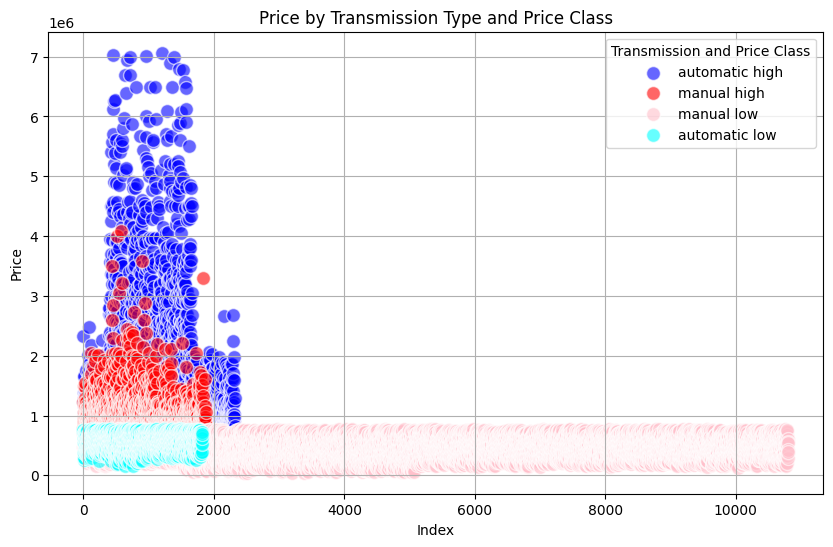

In [ ]:
df = pd.DataFrame(data)

# Вычисление квантиля 0.75
quantile_75 = df['price'].quantile(0.75)

# Создание графика
plt.figure(figsize=(10, 6))

# Определение цветов для автоматической и механической коробки передач
colors = {
    ('automatic', 'high'): 'blue',

    ('manual', 'high'): 'red',
    ('manual', 'low'): 'pink',
    ('automatic', 'low'): 'cyan'
}

# Построение точек для price
for (transmission, price_class), color in colors.items():
    subset = df[(df['transmission'] == transmission) & (df['price'] > quantile_75 if price_class == 'high' else df['price'] <= quantile_75)]
    plt.scatter(range(len(subset)), subset['price'], c=color, label=f'{transmission} {price_class}', alpha=0.6, edgecolors='w', s=100)

# Добавление легенды и меток осей
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price by Transmission Type and Price Class')
plt.legend(title='Transmission and Price Class')
plt.grid(True)

# Отображение графика
plt.show()

Точный тест Фишера прямой корреляции не обнаружил, хотя по матрице видим, что автомобили с автоматической коробкой передач в большей части попали в категорию "подороже", а с механической - в основном относятся к категории "подешевле"

Тест МакНемара

In [ ]:
age_class = data['age'].apply(lambda x: 'older' if x > 4 else 'newer')
dt = data['transmission'].where(data['fuel'] == 'petrol')
table = pd.crosstab(dt, age_class)
table

age,newer,older
transmission,,
automatic,656,2038
manual,1433,7393


In [ ]:
matrix = table.values
result = sm.stats.mcnemar(matrix, exact=False)

print(f"McNemar Statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

McNemar Statistic: 105.10400460962259
p-value: 1.1589047187331633e-24


In [ ]:
%%R
df_nemar <- df %>%
  mutate(price_class = ifelse(age > 4, 'older', 'newer'))

data_filtered <- df_nemar %>%
  filter(fuel == 'petrol')

table <- table(data_filtered$transmission, data_filtered$price_class)
print(table)
mcnemar.test(matrix(unlist(table), ncol=2, byrow=TRUE))

           
            newer older
  automatic   655  2038
  manual     1433  7393

	McNemar's Chi-squared test with continuity correction

data:  matrix(unlist(table), ncol = 2, byrow = TRUE)
McNemar's chi-squared = 105.1, df = 1, p-value < 2.2e-16



Корреляция не обнаружена

Посмторим корреляцию между числом машин с автоматической/механической коробкой передач и возрастом

In [ ]:
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import StratifiedTable

crosstab_data = data[['transmission', 'age', 'brand']].dropna()
selected_brands = crosstab_data['brand'].value_counts().index[:5]
filtered_data = crosstab_data[crosstab_data['brand'].isin(selected_brands)]
contingency_tables = {
    brand: pd.crosstab(
        filtered_data[filtered_data['brand'] == brand]['transmission'],
        filtered_data[filtered_data['brand'] == brand]['age'] > 4
    )
    for brand in selected_brands
}

stratified_table = StratifiedTable([table.values for table in contingency_tables.values()])
cmh_result = stratified_table.oddsratio_pooled
cmh_pvalue = stratified_table.test_null_odds().pvalue
print(f"CMH Odds Ratio: {cmh_result}")
print(f"p-value: {cmh_pvalue}")

CMH Odds Ratio: 1.7305273631109759
p-value: 0.0


In [ ]:
%%R
crosstab_data <- df %>%
  select(transmission, age, brand) %>%
  drop_na()
selected_brands <- crosstab_data %>%
  count(brand) %>%
  arrange(desc(n)) %>%
  head(5) %>%
  pull(brand)

filtered_data <- crosstab_data %>%
  filter(brand %in% selected_brands)
contingency_tables <- filtered_data %>%
  group_by(brand) %>%
  summarise(table = list(table(transmission, age > 4))) %>%
  pull(table)
contingency_array <- array(0, dim = c(2, 2, length(selected_brands)))
for (i in seq_along(selected_brands)) {
  contingency_array[,,i] <- as.matrix(contingency_tables[[i]])
}

cmh_result <- mantelhaen.test(contingency_array)
cat("CMH Odds Ratio:", cmh_result$estimate, "\n")
cat("p-value:", cmh_result$p.value, "\n")

CMH Odds Ratio: 1.730527 
p-value: 2.547903e-20 


Корреляции также нет

# 4. Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии

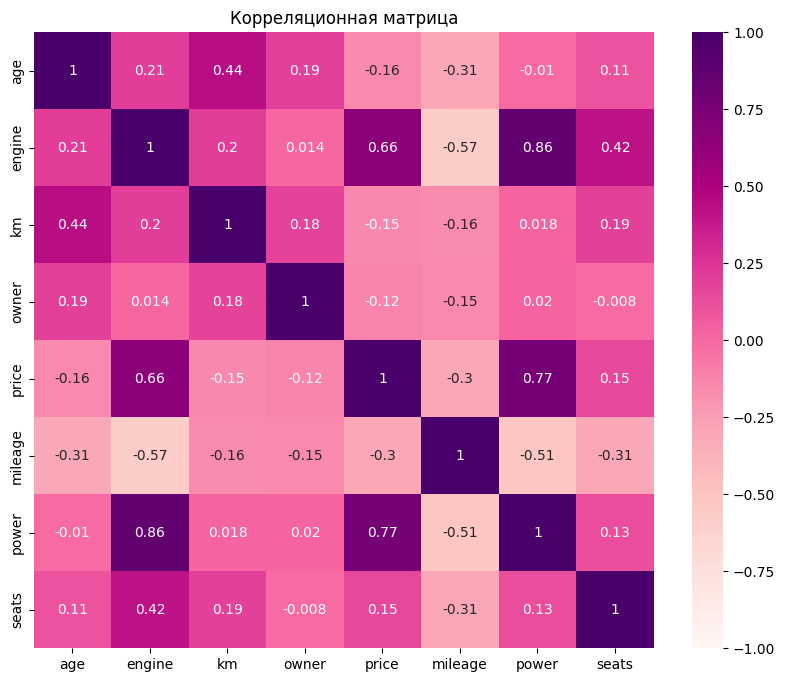

In [ ]:
df_numeric = data.drop(columns = ['brand', 'model', 'transmission', 'fuel', 'location', 'type'] )
corr_matrix = df_numeric.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()


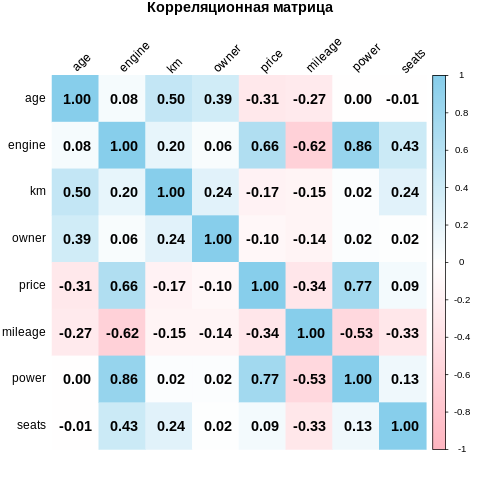

In [ ]:
%%R
df_numeric <- df[, !(names(df) %in% c("brand", "model", "transmission", "fuel", "location", "type"))]
df_numeric <- na.omit(df_numeric)
corr_matrix <- cor(df_numeric)
corrplot(corr_matrix, method = "color", col = colorRampPalette(c("lightpink", "white", "skyblue"))(200),
         tl.col = "black", tl.srt = 45, addCoef.col = "black", number.cex = 1.2,
         main = "Корреляционная матрица", mar = c(0, 0, 1, 0))

In [ ]:
from statsmodels.tools.tools import add_constant
df_numeric = df_numeric.dropna()
X = add_constant(df_numeric)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data["feature"] != "const"]
print("\nФактор инфляции дисперсии (VIF):")
print(vif_data)


Фактор инфляции дисперсии (VIF):
   feature       VIF
1      age  1.953776
2   engine  7.549225
3       km  1.554070
4    owner  1.182382
5    price  3.234450
6  mileage  1.841771
7    power  7.112194
8    seats  1.809424


In [ ]:
%%R
df_vif <- df_numeric %>% drop_na()
df_vif$const <- 1
model <- lm(const ~ ., data = df_vif)
vif_values <- vif(model)
vif_data <- data.frame(
  feature = names(vif_values),
  VIF = as.numeric(vif_values)
)

cat("\nФактор инфляции дисперсии (VIF):\n")
print(vif_data)


Фактор инфляции дисперсии (VIF):
  feature      VIF
1     age 1.953776
2  engine 7.549225
3      km 1.554070
4   owner 1.182382
5   price 3.234450
6 mileage 1.841771
7   power 7.112194
8   seats 1.809424


# 5. Исследовать зависимости в данных с помощью дисперсионного анализа.
Предположим, что цены на автомобили марки Skoda должны иметь одинаковое математическое ожидание для разных городов. Проверим:

In [ ]:
from scipy.stats import f_oneway

np.random.seed(42)
group1 = np.random.normal(loc=5, scale=1, size=50)
group2 = np.random.normal(loc=5.2, scale=1, size=50)
group3 = np.random.normal(loc=4.9, scale=1, size=50)
f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-статистика: {f_stat:.4f}")
print(f"P-значение: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние статистически не различаются.")

F-статистика: 3.1062
P-значение: 0.0477
Отвергаем нулевую гипотезу: средние значимо различаются.


In [ ]:
%%R
set.seed(42)
group1 <- rnorm(50, mean = 5, sd = 1)
group2 <- rnorm(50, mean = 5.1, sd = 1)
group3 <- rnorm(50, mean = 4.9, sd = 1)

# Объединение данных в единый набор
data <- data.frame(
  value = c(group1, group2, group3),
  group = factor(rep(c("Group1", "Group2", "Group3"), each = 50))
)

# Проведение ANOVA
anova_result <- aov(value ~ group, data = data)
summary(anova_result)

             Df Sum Sq Mean Sq F value Pr(>F)  
group         2   5.11   2.555    2.52 0.0839 .
Residuals   147 149.05   1.014                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Многофакторным дисперсионным анализом посмотрим, как влияют на цену объем двигателя и лошадиные сиды

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
clean_data = data[['engine', 'price', 'power']].dropna()

# Create a formula for interaction between engine and power on price
formula = 'price ~ engine * power'
model = ols(formula, data=clean_data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
engine,8.353984e+11,1.0,1.954819,0.162121
power,9.721683e+14,1.0,2274.858487,0.000000
engine:power,9.807647e+11,1.0,2.294974,0.129847
Residual,2.513265e+15,5881.0,NaN,NaN


In [ ]:
%%R
summary(aov(price ~ engine * power, df_numeric))

               Df    Sum Sq   Mean Sq  F value Pr(>F)    
engine          1 2.642e+15 2.642e+15 6215.977 <2e-16 ***
power           1 9.739e+14 9.739e+14 2291.092 <2e-16 ***
engine:power    1 1.103e+12 1.103e+12    2.596  0.107    
Residuals    5843 2.484e+15 4.251e+11                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# 6. Подогнать регрессионные модели (в том числе, нелинейные) к данным, а также оценить качество подобной аппроксимации.
Начнем с линейной регрессии. Предсказывать будем цену, используя все числовые параметры датасета

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_numeric.drop(columns =['price'])
y = df_numeric['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R^2 Score: {r2}")

Linear Regression - Mean Squared Error: 371676172374.8901
Linear Regression - R^2 Score: 0.6877100226040687


In [ ]:
%%R
trainIndex <- createDataPartition(df_numeric$price, p = 0.8, list = FALSE)
trainData <- df_numeric[trainIndex, ]
testData <- df_numeric[-trainIndex, ]

# Создание модели линейной регрессии
model <- lm(price ~ ., data = trainData)

# Предсказание на тестовой выборке
y_pred <- predict(model, newdata = testData)

# Вычисление метрик оценки модели
mse <- mean((testData$price - y_pred)^2)
r2 <- summary(model)$r.squared

# Вывод результатов
cat("Linear Regression - Mean Squared Error:", mse, "\n")
cat("Linear Regression - R^2 Score:", r2, "\n")

Linear Regression - Mean Squared Error: 374023239613 
Linear Regression - R^2 Score: 0.7040218 


Линейная регрессия приближает цену с r2 score = 0.68, что далеко от идеала, но в целом приемлемо. Попробуем другие модели:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

poly_model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid_poly = {
    'polynomialfeatures__degree': [2, 3, 4],
    'linearregression__fit_intercept': [True, False]
}
grid_search_poly = GridSearchCV(estimator=poly_model, param_grid=param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_search_poly.fit(X_train, y_train)
print(f"Best parameters for Polynomial Regression: {grid_search_poly.best_params_}")

best_poly_model = grid_search_poly.best_estimator_
y_pred_poly = best_poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R^2 Score: {r2_poly}")


Best parameters for Polynomial Regression: {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2}
Polynomial Regression - Mean Squared Error: 226032424298.93927
Polynomial Regression - R^2 Score: 0.8100829003268326


In [ ]:
%%R
poly_model <- lm(price ~ .^2, data = trainData)
poly_pred <- predict(poly_model, newdata = testData)
poly_mse <- mean((testData$price - poly_pred)^2)
poly_r2 <- summary(poly_model)$r.squared

cat("Polynomial Regression - Mean Squared Error:", poly_mse, "\n")
cat("Polynomial Regression - R^2 Score:", poly_r2, "\n")

Polynomial Regression - Mean Squared Error: 236069872663 
Polynomial Regression - R^2 Score: 0.8184112 


Видим, что квадратичным полиномом степени 2 получается добиться r2 score = 0.81. Уже лучше!

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error')

grid_search_tree.fit(X_train, y_train)

print(f"Best parameters for Decision Tree Regression: {grid_search_tree.best_params_}")
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression - Mean Squared Error: {mse_tree}")
print(f"Decision Tree Regression - R^2 Score: {r2_tree}")


Best parameters for Decision Tree Regression: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Regression - Mean Squared Error: 142264830500.95892
Decision Tree Regression - R^2 Score: 0.880466158437059


Получили r2 score 0.88, что в целом неплохо
Дерево решений на R также успешно обучить не получилось:

Decision Tree Regression - Mean Squared Error: 295627124205 
Decision Tree Regression - R^2 Score: 0.7090115 


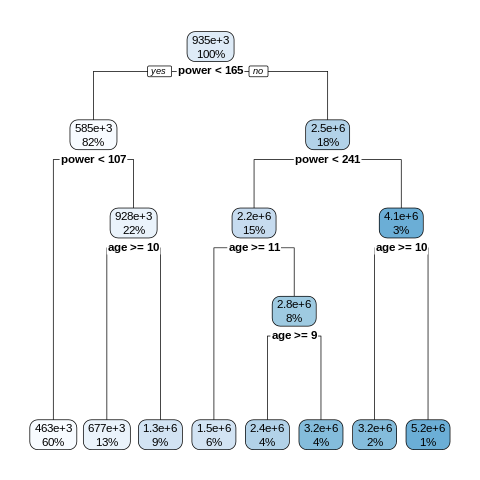

In [ ]:
%%R
tree_model <- rpart(price ~ ., data = trainData, method = "anova")
tree_pred <- predict(tree_model, newdata = testData)
tree_mse <- mean((testData$price - tree_pred)^2)
tree_r2 <- 1 - sum((testData$price - tree_pred)^2) / sum((testData$price - mean(testData$price))^2)

cat("Decision Tree Regression - Mean Squared Error:", tree_mse, "\n")
cat("Decision Tree Regression - R^2 Score:", tree_r2, "\n")

# Визуализация дерева решений
rpart.plot(tree_model)